# Analysing deviations

In [1]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

import utils
import trq_stats

# 1. Exploring the quality data

## 1.1. Reading the quality spreadsheet

In [2]:
df_quality_full = pd.read_excel(r'D:\HiWi 2.0\Daten\Qualitätsdaten_Final.xlsx', sheet_name='KMG-Qualitätsdaten')
bearbeitungszeiten = pd.read_excel(r'D:\HiWi 2.0\Daten\Qualitätsdaten_Final.xlsx', sheet_name='Bearbeitungszeiten')
outputdata = pd.read_excel(r'D:\HiWi 2.0\Daten\Qualitätsdaten_Final.xlsx', sheet_name='OutputData')

In [3]:
# df_quality.head()

In [4]:
# Getting just the first 30 HV
filter_HV = (df_quality_full['HV-Nummer'].str[2:].astype(int) <= 30) #& (df_quality_full['HV-Nummer'].str[2:].astype(int) != 13)
df_quality = df_quality_full[filter_HV]

In [5]:
filter_bezeichnung = (df_quality['Bezeichnung'] == 'Aussenkontur')

In [7]:
df_quality.columns

Index(['HV-Nummer', 'Feature', 'Bezeichnung', 'Geradheit_Zmin_X0 [mm]',
       'Geradheit_Zmin_X1 [mm]', 'Geradheit_Zmin_Y0 [mm]',
       'Geradheit_Zmin_Y1 [mm]', 'Geradheit_Zmax_X0 [mm]',
       'Geradheit_Zmax_X1 [mm]', 'Geradheit_Zmax_Y0 [mm]',
       'Geradheit_Zmax_Y1 [mm]', 'Ebenheit_X0 [mm]', 'Ebenheit_X1 [mm]',
       'Ebenheit_Y0 [mm]', 'Ebenheit_Y1 [mm]', 'XMaß_Zmin [mm]',
       'YMaß_Zmin [mm]', 'XMaß_Zmax [mm]', 'YMaß_Zmax [mm]',
       'XPosition_Zmin [mm]', 'XPosition_Zmax [mm]', 'YPosition_Zmin [mm]',
       'YPosition_Zmax [mm]', 'Durchmesser_Zmin [mm]', 'Durchmesser_Zmax [mm]',
       'Rundheit_Zmin [mm]', 'Rundheit_Zmax [mm]'],
      dtype='object')

In [8]:
df_aussenkontur = df_quality[filter_bezeichnung][df_quality.columns[:-8]]
print(df_aussenkontur.shape)
df_aussenkontur.head()

(30, 19)


,HV-Nummer,Feature,Bezeichnung,Geradheit_Zmin_X0 [mm],Geradheit_Zmin_X1 [mm],Geradheit_Zmin_Y0 [mm],Geradheit_Zmin_Y1 [mm],Geradheit_Zmax_X0 [mm],Geradheit_Zmax_X1 [mm],Geradheit_Zmax_Y0 [mm],Geradheit_Zmax_Y1 [mm],Ebenheit_X0 [mm],Ebenheit_X1 [mm],Ebenheit_Y0 [mm],Ebenheit_Y1 [mm],XMaß_Zmin [mm],YMaß_Zmin [mm],XMaß_Zmax [mm],YMaß_Zmax [mm]
0,HV1,Channel,Aussenkontur,0.01441,0.01567,0.01431,0.01114,0.01422,0.01135,0.01389,0.01491,0.01916,0.01785,0.01486,0.01521,60.02753,60.01764,60.05858,60.04519
5,HV2,Channel,Aussenkontur,0.00715,0.00456,0.01019,0.00356,0.00893,0.01509,0.00491,0.03587,0.01088,0.01673,0.01020,0.03706,59.98691,59.97789,60.01108,60.00074
10,HV3,Channel,Aussenkontur,0.02372,0.02710,0.01637,0.02531,0.03277,0.02267,0.02309,0.01982,0.03345,0.02711,0.02390,0.02458,59.99340,60.01185,60.00670,60.02636
15,HV4,Channel,Aussenkontur,0.02580,0.02983,0.03443,0.01847,0.00509,0.00509,0.00897,0.00522,0.02543,0.03021,0.03473,0.01843,59.99595,59.99529,60.03196,60.02632
20,HV5,Channel,Aussenkontur,0.03388,0.05439,0.04557,0.03462,0.04349,0.05541,0.05577,0.03522,0.04317,0.05513,0.05490,0.03555,59.98347,60.01962,60.03127,60.04667


In [9]:
# I assume XMass and YMass should not be zero, so drop rows where that's the case
df_aussenkontur = df_aussenkontur[df_aussenkontur['XMaß_Zmax [mm]'] != 0]

In [10]:
print(df_aussenkontur.shape)
# df_aussenkontur

(26, 19)


In [11]:
df_aussenkontur.describe().T

,count,mean,std,min,25%,50%,75%,max
Geradheit_Zmin_X0 [mm],26.0,0.029985,0.019462,0.00308,0.015252,0.029230,0.040505,0.07031
Geradheit_Zmin_X1 [mm],26.0,0.032479,0.023679,0.00213,0.018028,0.029890,0.038328,0.08754
Geradheit_Zmin_Y0 [mm],26.0,0.038669,0.025846,0.00566,0.016495,0.033920,0.055053,0.09490
Geradheit_Zmin_Y1 [mm],26.0,0.027487,0.018850,0.00144,0.011732,0.027040,0.038128,0.08069
Geradheit_Zmax_X0 [mm],26.0,0.030800,0.023626,0.00212,0.014670,0.027035,0.038085,0.09734
Geradheit_Zmax_X1 [mm],26.0,0.033603,0.029932,0.00329,0.015272,0.023705,0.042618,0.12806
Geradheit_Zmax_Y0 [mm],26.0,0.041426,0.032829,0.00159,0.012120,0.041840,0.063963,0.12141
Geradheit_Zmax_Y1 [mm],26.0,0.028768,0.018411,0.00165,0.017548,0.026450,0.039477,0.07073
Ebenheit_X0 [mm],26.0,0.037552,0.024858,0.00350,0.021447,0.033895,0.043807,0.09850
Ebenheit_X1 [mm],26.0,0.039366,0.030075,0.00327,0.022420,0.032865,0.046643,0.13106


In [12]:
def plot_bar(column, expected_value=None, decimal_places=1):
    plt.figure(figsize=(16, 4))
    plt.bar(x=df_aussenkontur['HV-Nummer'].str[2:], height=column)
    if expected_value:
        plt.axhline(expected_value, color='r', linestyle='--')
    plt.xlabel('HV')
    y_ubound = math.ceil(column.max() * (10**decimal_places)) / (10**decimal_places)
    y_lbound = math.floor(column.min() * (10**decimal_places)) / (10**decimal_places)
    plt.ylim((y_lbound, y_ubound))

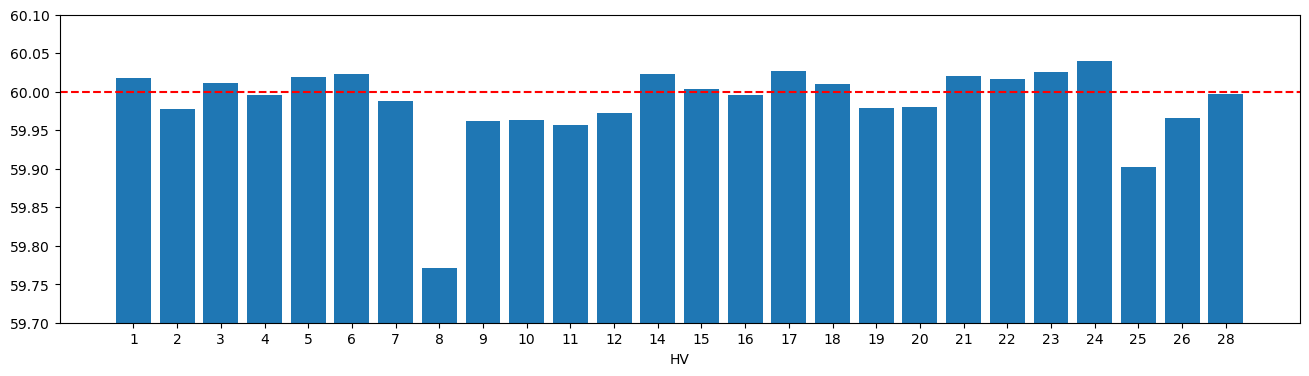

In [13]:
plot_bar(df_aussenkontur['YMaß_Zmin [mm]'], 60)

In [14]:
df_aussenkontur['XMaß_deviation'] = df_aussenkontur['XMaß_Zmax [mm]'] - 60
df_aussenkontur['YMaß_deviation'] = df_aussenkontur['YMaß_Zmax [mm]'] - 60

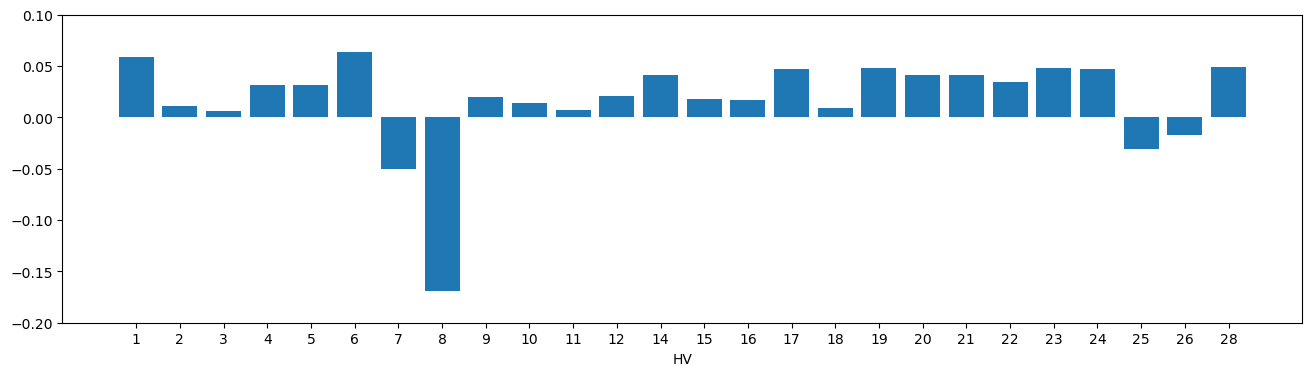

In [15]:
plot_bar(df_aussenkontur['XMaß_deviation'], decimal_places=1)

In absolute terms, the biggest deviation in X is HV8, the lowest is HV3. 

In [16]:
columns = ['HV-Nummer', 'Bezeichnung', 'XMaß_Zmin [mm]', 'XMaß_Zmax [mm]', 'XMaß_deviation']
df_aussenkontur.iloc[df_aussenkontur['XMaß_deviation'].abs().argmin()][columns]

HV-Nummer                  HV3
Bezeichnung       Aussenkontur
XMaß_Zmin [mm]         59.9934
XMaß_Zmax [mm]         60.0067
XMaß_deviation          0.0067
Name: 10, dtype: object

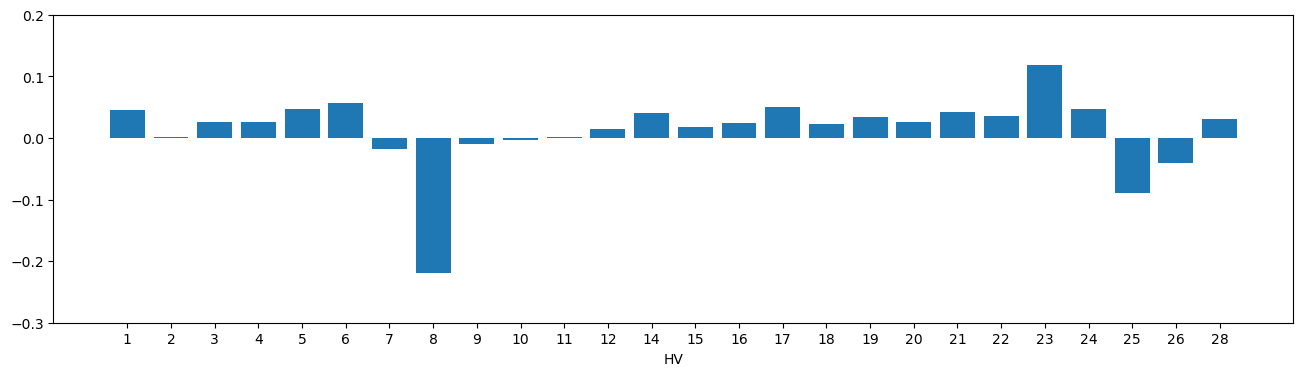

In [17]:
%matplotlib inline
plot_bar(df_aussenkontur['YMaß_deviation'], decimal_places=1)

In absolute terms, the biggest deviation in Y is HV8, the lowest is HV2. 

In [18]:
columns = ['HV-Nummer', 'Bezeichnung', 'YMaß_Zmin [mm]', 'YMaß_Zmax [mm]', 'YMaß_deviation']
df_aussenkontur.iloc[df_aussenkontur['YMaß_deviation'].abs().argmin()][columns]

HV-Nummer                  HV2
Bezeichnung       Aussenkontur
YMaß_Zmin [mm]        59.97789
YMaß_Zmax [mm]        60.00074
YMaß_deviation         0.00074
Name: 5, dtype: object

The deviations in X and Y are highly (linearly) correlated.

In [19]:
df_aussenkontur[['XMaß_deviation', 'YMaß_deviation']].corr()

,XMaß_deviation,YMaß_deviation
XMaß_deviation,1.000000,0.923865
YMaß_deviation,0.923865,1.000000


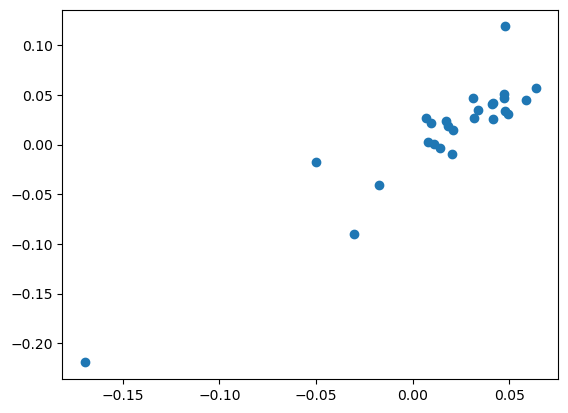

In [20]:
%matplotlib inline
plt.scatter(x=df_aussenkontur['XMaß_deviation'], y=df_aussenkontur['YMaß_deviation'])

## 1.2. Find the time window for Aussenkontur

In [21]:
from SLD import utils

In [22]:
utils.get_HV_folder_name(19)

['HV19_D8_1S_Schrupp_X0.0_Y240.0']

In [23]:
df_drive19 = pd.read_parquet(r'D:\HiWi 2.0\Daten\Hauptversuche\HV19_D8_1S_Schrupp_X0.0_Y240.0\Daten\Zeitreihendaten\drive.parquet')

In [24]:
df_drive19['S1ActTrq'].describe()

count    328851.000000
mean         41.420230
std          91.444116
min        -761.000000
25%           7.000000
50%          40.000000
75%          57.000000
max         914.000000
Name: S1ActTrq, dtype: float64

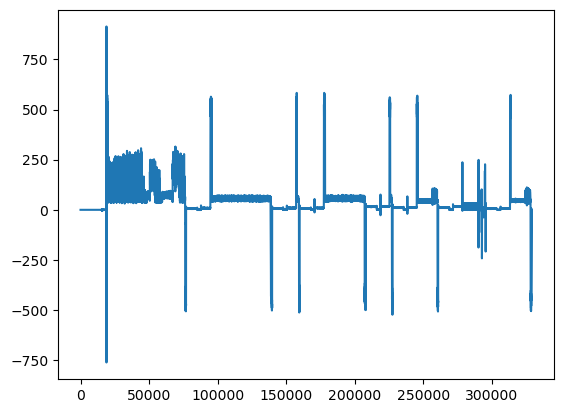

In [25]:
%matplotlib inline
plt.plot(df_drive19['S1ActTrq'])

In [26]:
df_prog19 = pd.read_parquet(r'D:\HiWi 2.0\Daten\Hauptversuche\HV19_D8_1S_Schrupp_X0.0_Y240.0\Daten\Zeitreihendaten\prog.parquet')

In [27]:
df = pd.merge_asof(df_drive19[['Timestamp', 'S1ActTrq']], df_prog19[['Timestamp', 'Operation']], on='Timestamp', direction='backward')
df.dropna(inplace=True)

In [28]:
df['Operation_simple'] = df['Operation'].apply(utils.simplify_operation)

In [29]:
df['Operation'].unique()

array(['Channel Block_HV19_D8_1S_Schrupp_ap1.4_step_0',
       'Cavity Block_HV19_D8_1S_Schrupp_step_0',
       'Cavity Block (2)_HV19_D8_1S_Schrupp_step_0',
       'Cavity Block (3)_HV19_Passung_10H7_rAufmaß0.21_st',
       'Cavity Block (3)_HV19_D4_3S_Passung_10H7_step_0',
       'Cavity Block (3)_HV19_D4_3S_Passung_10H7_step_1',
       'Cavity Block (4)_HV19_Passung_8H7_rAufmaß0.21_ste',
       'Cavity Block (4)_HV19_D4_3S_Passung_8H7_step_0',
       'Cavity Block (4)_HV19_D4_3S_Passung_8H7_step_1',
       'Hole Block_Operation_step_0', 'Hole Block_Operation (2)_step_0',
       'Hole Block (2)_Operation_step_0',
       'Hole Block (2)_Operation (2)_step_0'], dtype=object)

In [30]:
hv_bezeichnung_filter = (outputdata['HV-Nummer'] == 'HV19') & (outputdata['Bezeichnung'] == 'Aussenkontur')
operation = outputdata[hv_bezeichnung_filter]['Operationsname'].iloc[0]
operation

'Channel Block_HV19_D8_1S_Schrupp_ap1.4_step_0'

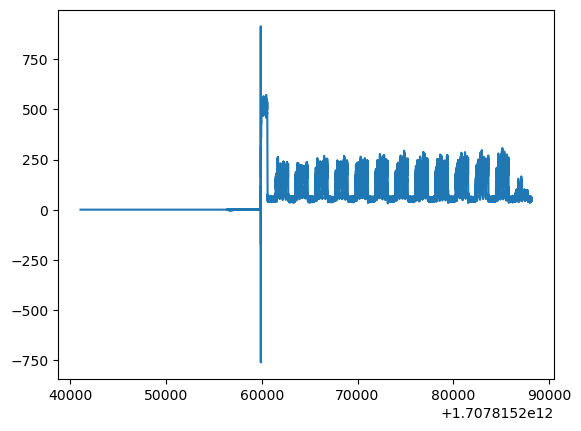

In [31]:
%matplotlib inline
plt.plot(df[df['Operation'] == operation]['Timestamp'], df[df['Operation'] == operation]['S1ActTrq'])
plt.show()

In [32]:
b = df[df['Operation_simple'] == 'Nut']['S1ActTrq'].describe()
pd.DataFrame([b for _ in range(3)])

,count,mean,std,min,25%,50%,75%,max
S1ActTrq,47074.0,77.713812,95.5108,-761.0,0.0,51.0,145.0,914.0
S1ActTrq,47074.0,77.713812,95.5108,-761.0,0.0,51.0,145.0,914.0
S1ActTrq,47074.0,77.713812,95.5108,-761.0,0.0,51.0,145.0,914.0


In [33]:
b.rename('oi', inplace=True)

count    47074.000000
mean        77.713812
std         95.510800
min       -761.000000
25%          0.000000
50%         51.000000
75%        145.000000
max        914.000000
Name: oi, dtype: float64

In [34]:
def get_trq_stats(hv_numbers, bezeichnungen, outputdata=None):
    if type(hv_numbers) == int:
        # In case a single number is given
        hv_numbers = [hv_numbers]
    if not outputdata:
        outputdata = pd.read_excel(r'D:\HiWi 2.0\Daten\Qualitätsdaten_Final.xlsx', sheet_name='OutputData')

    list_trq_stats = []

    for hv_number in hv_numbers:
        folder_name = utils.get_HV_folder_name(hv_number)[0]

        # Read drive and prog datasets, merge them, and preprocess the operation column
        drive = pd.read_parquet(Path(r'D:\HiWi 2.0\Daten\Hauptversuche', folder_name, r'Daten\Zeitreihendaten\drive.parquet'))
        prog = pd.read_parquet(Path(r'D:\HiWi 2.0\Daten\Hauptversuche', folder_name, r'Daten\Zeitreihendaten\prog.parquet'))
        df = pd.merge_asof(drive[['Timestamp', 'S1ActTrq']], prog[['Timestamp', 'Operation']], on='Timestamp', direction='backward')
        df.dropna(inplace=True)

        for bezeichnung in bezeichnungen:
            # Find the name of the operation corresponding to the bezeichnung in question and get the trq stats
            hv_bezeichnung_filter = (outputdata['HV-Nummer'] == f'HV{hv_number}') & (outputdata['Bezeichnung'] == bezeichnung)
            operation = outputdata[hv_bezeichnung_filter]['Operationsname'].iloc[0]
            trq_stats = df[df['Operation'] == operation]['S1ActTrq'].describe().rename(f'HV{hv_number}')
            trq_stats['Bezeichnung'] = bezeichnung
            list_trq_stats.append(trq_stats)

    return pd.DataFrame(list_trq_stats).reset_index(names='HV-Nummer')

In [71]:
expected_values = {
    'Aussenkontur': {'columns': ['XMaß_Zmax [mm]', 'YMaß_Zmax [mm]'], 'expected_values': [60, 60]}, 
    'Steg': {'columns': ['XMaß_Zmin [mm]', 'YMaß_Zmin [mm]'], 'expected_values': [56, 56]}, 
    'Tasche': {'columns': ['XMaß_Zmax [mm]', 'YMaß_Zmax [mm]'], 'expected_values': [40, 40]}, 
    'Passung 10H7': {'columns': ['Durchmesser_Zmax [mm]'], 'expected_values': [10]}, 
    'Passung 8H7': {'columns': ['Durchmesser_Zmax [mm]'], 'expected_values': [8]}
}

In [72]:
def build_df_trq_dev(hv_numbers, bezeichnung, expected_values=expected_values, df_trq_stats=None, df_quality=None):
    if df_trq_stats == None:    
        df_trq_stats = get_trq_stats(hv_numbers, bezeichnungen=[bezeichnung])
    if df_quality == None:
        df_quality_full = pd.read_excel(r'D:\HiWi 2.0\Daten\Qualitätsdaten_Final.xlsx', sheet_name='KMG-Qualitätsdaten')
        df_quality = df_quality_full[df_quality_full['HV-Nummer'].str[2:].astype(int).isin(hv_numbers)]
    
    df_merged = pd.merge(df_trq_stats, df_quality, on=['HV-Nummer', 'Bezeichnung'])
    for i, column in enumerate(expected_values[bezeichnung]['columns']):
        df_merged[f'{column}_deviation'] = df_merged[column] - expected_values[bezeichnung]['expected_values'][i]
    
    return df_merged

In [35]:
get_trq_stats([1, 2, 3], ['Aussenkontur', 'Steg', 'Tasche'])

,HV-Nummer,count,mean,std,min,25%,50%,75%,max,Bezeichnung
0,HV1,62308.0,85.307729,56.831877,-757.0,65.0,92.0,98.0,912.0,Aussenkontur
1,HV1,95526.0,61.106934,6.176919,39.0,57.0,61.0,65.0,84.0,Steg
2,HV1,59187.0,64.010222,61.496392,-516.0,63.0,74.0,80.0,102.0,Tasche
3,HV2,61465.0,71.671114,70.049106,-16.0,0.0,73.0,111.0,570.0,Aussenkontur
4,HV2,62764.0,63.999936,7.358447,39.0,60.0,65.0,69.0,85.0,Steg
5,HV2,41544.0,66.794050,74.427750,-513.0,63.0,77.0,92.0,114.0,Tasche
6,HV3,109946.0,68.371128,46.893684,-19.0,48.0,84.0,93.0,572.0,Aussenkontur
7,HV3,46949.0,68.098575,12.045273,31.0,60.0,72.0,77.0,93.0,Steg
8,HV3,67484.0,66.781370,49.133861,-500.0,59.0,76.0,83.0,101.0,Tasche


## 1.3. Comparing deviation and torque

In [36]:
hv_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30]

In [37]:
df_trq_stats = get_trq_stats(hv_numbers, ['Aussenkontur', 'Steg', 'Tasche'])
# df_trq_stats

In [38]:
filter_bezeichnung = (df_quality['Bezeichnung'].isin(['Aussenkontur', 'Steg', 'Tasche']))
df_quality_filtered = df_quality[filter_bezeichnung]

In [39]:
df_merged = pd.merge(df_trq_stats, df_quality_filtered, on=['HV-Nummer', 'Bezeichnung'])

In [40]:
df_merged['XMaß_deviation'] = df_merged['XMaß_Zmax [mm]'] - 60
df_merged['YMaß_deviation'] = df_merged['YMaß_Zmax [mm]'] - 60

In [41]:
df_merged[list(df_trq_stats.columns) + ['XMaß_deviation', 'YMaß_deviation']]

,HV-Nummer,count,mean,std,min,25%,50%,75%,max,Bezeichnung,XMaß_deviation,YMaß_deviation
0,HV1,62308.0,85.307729,56.831877,-757.0,65.0,92.0,98.0,912.0,Aussenkontur,0.05858,0.04519
1,HV1,95526.0,61.106934,6.176919,39.0,57.0,61.0,65.0,84.0,Steg,-60.00000,-60.00000
2,HV1,59187.0,64.010222,61.496392,-516.0,63.0,74.0,80.0,102.0,Tasche,-20.09866,-20.09724
3,HV2,61465.0,71.671114,70.049106,-16.0,0.0,73.0,111.0,570.0,Aussenkontur,0.01108,0.00074
4,HV2,62764.0,63.999936,7.358447,39.0,60.0,65.0,69.0,85.0,Steg,-60.00000,-60.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
76,HV28,7631.0,121.688507,91.491426,13.0,57.0,76.0,170.0,436.0,Steg,-60.00000,-60.00000
77,HV28,12692.0,92.266546,171.491406,-508.0,59.0,77.0,88.0,501.0,Tasche,-20.28914,-20.37061
78,HV30,34002.0,74.251397,124.104568,-759.0,0.0,0.0,71.0,912.0,Aussenkontur,-60.00000,-60.00000
79,HV30,6984.0,118.039948,89.580244,18.0,58.0,74.0,159.0,496.0,Steg,-60.00000,-60.00000


In [42]:
df_merged[df_merged['Bezeichnung'] == 'Aussenkontur'][list(df_trq_stats.columns) + ['XMaß_deviation', 'YMaß_deviation']]

,HV-Nummer,count,mean,std,min,25%,50%,75%,max,Bezeichnung,XMaß_deviation,YMaß_deviation
0,HV1,62308.0,85.307729,56.831877,-757.0,65.0,92.0,98.0,912.0,Aussenkontur,0.05858,0.04519
3,HV2,61465.0,71.671114,70.049106,-16.0,0.0,73.0,111.0,570.0,Aussenkontur,0.01108,0.00074
6,HV3,109946.0,68.371128,46.893684,-19.0,48.0,84.0,93.0,572.0,Aussenkontur,0.00670,0.02636
9,HV4,109921.0,67.115947,48.738646,-16.0,54.0,79.0,86.0,566.0,Aussenkontur,0.03196,0.02632
12,HV5,64765.0,73.623578,75.327364,-20.0,0.0,53.0,127.0,569.0,Aussenkontur,0.03127,0.04667
15,HV6,65122.0,68.782147,70.445102,-17.0,0.0,58.0,112.0,566.0,Aussenkontur,0.06370,0.05671
18,HV7,53253.0,82.027473,84.157775,-20.0,-7.0,56.0,158.0,567.0,Aussenkontur,-0.05019,-0.01784
21,HV8,52114.0,81.809686,79.535389,0.0,6.0,61.0,135.0,576.0,Aussenkontur,-0.16956,-0.21936
24,HV9,44866.0,83.072483,92.697276,0.0,5.0,54.0,155.0,572.0,Aussenkontur,0.02012,-0.00906
27,HV10,34363.0,107.416378,94.165201,-755.0,49.0,68.0,185.0,565.0,Aussenkontur,0.01428,-0.00393


Text(0, 0.5, 'XMaß_deviation')

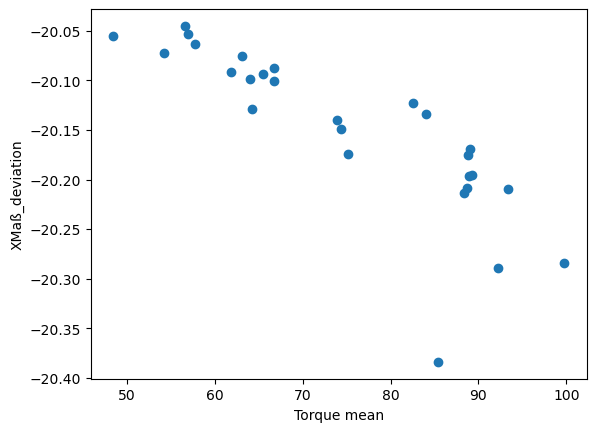

In [43]:
%matplotlib inline
plt.scatter(x=df_merged[df_merged['Bezeichnung'] == 'Tasche']['mean'], y=df_merged[df_merged['Bezeichnung'] == 'Tasche']['XMaß_deviation'])
plt.xlabel('Torque mean')
plt.ylabel('XMaß_deviation')

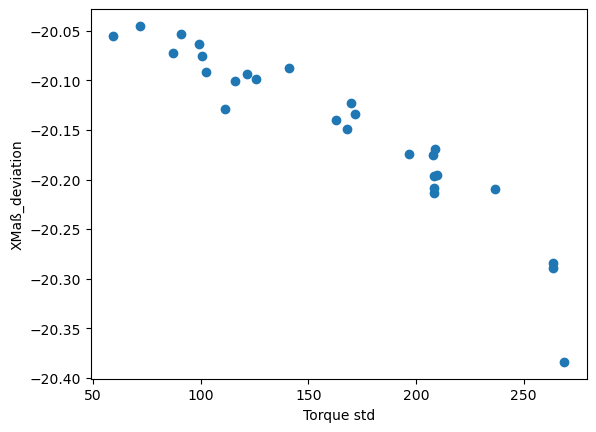

In [44]:
%matplotlib inline
plt.scatter(x=df_merged[df_merged['Bezeichnung'] == 'Tasche']['std'] + df_merged[df_merged['Bezeichnung'] == 'Tasche']['mean'], y=df_merged[df_merged['Bezeichnung'] == 'Tasche']['XMaß_deviation'])
plt.xlabel('Torque std')
plt.ylabel('XMaß_deviation')
plt.show()

Text(0, 0.5, 'YMaß_deviation')

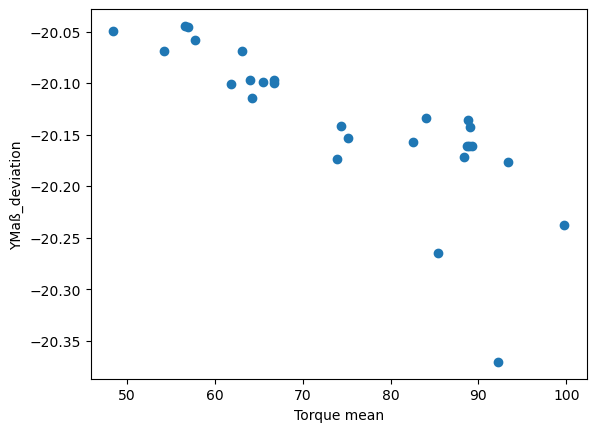

In [45]:
%matplotlib inline
plt.scatter(x=df_merged[df_merged['Bezeichnung'] == 'Tasche']['mean'], y=df_merged[df_merged['Bezeichnung'] == 'Tasche']['YMaß_deviation'])
plt.xlabel('Torque mean')
plt.ylabel('YMaß_deviation')

Text(0, 0.5, 'XMaß_deviation')

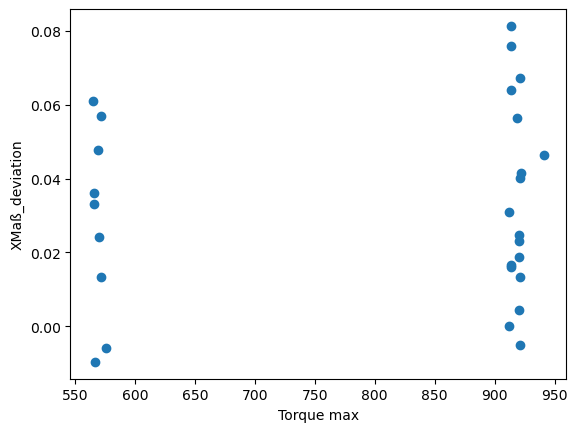

In [150]:
%matplotlib inline
plt.scatter(x=df_merged[df_merged['Bezeichnung'] == 'Aussenkontur']['max'], y=df_merged[df_merged['Bezeichnung'] == 'Aussenkontur']['XMaß_deviation'])
plt.xlabel('Torque max')
plt.ylabel('XMaß_deviation')

Text(0, 0.5, 'XMaß_deviation')

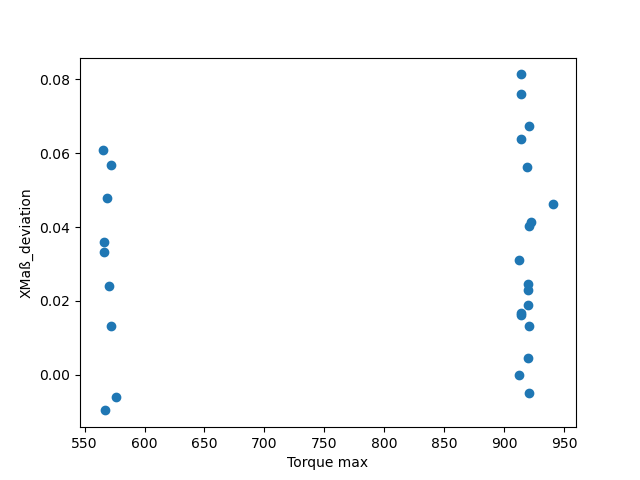

In [157]:
%matplotlib widget
plt.scatter(x=df_merged[df_merged['Bezeichnung'] == 'Aussenkontur']['max'], y=df_merged[df_merged['Bezeichnung'] == 'Aussenkontur']['XMaß_deviation'])
plt.xlabel('Torque max')
plt.ylabel('XMaß_deviation')

## 1.4. awdhauwihdiuaw

In [79]:
hv_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28]

In [80]:
df_trq_dev = build_df_trq_dev(hv_numbers, bezeichnung='Aussenkontur')

In [81]:
df_trq_dev

,HV-Nummer,count,mean,std,min,25%,50%,75%,max,Bezeichnung,...,XPosition_Zmin [mm],XPosition_Zmax [mm],YPosition_Zmin [mm],YPosition_Zmax [mm],Durchmesser_Zmin [mm],Durchmesser_Zmax [mm],Rundheit_Zmin [mm],Rundheit_Zmax [mm],XMaß_Zmax [mm]_deviation,YMaß_Zmax [mm]_deviation
0,HV1,62308.0,85.307729,56.831877,-757.0,65.0,92.0,98.0,912.0,Aussenkontur,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05858,0.04519
1,HV2,61465.0,71.671114,70.049106,-16.0,0.0,73.0,111.0,570.0,Aussenkontur,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01108,0.00074
2,HV3,109946.0,68.371128,46.893684,-19.0,48.0,84.0,93.0,572.0,Aussenkontur,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00670,0.02636
3,HV4,109921.0,67.115947,48.738646,-16.0,54.0,79.0,86.0,566.0,Aussenkontur,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03196,0.02632
4,HV5,64765.0,73.623578,75.327364,-20.0,0.0,53.0,127.0,569.0,Aussenkontur,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03127,0.04667
5,HV6,65122.0,68.782147,70.445102,-17.0,0.0,58.0,112.0,566.0,Aussenkontur,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06370,0.05671
6,HV7,53253.0,82.027473,84.157775,-20.0,-7.0,56.0,158.0,567.0,Aussenkontur,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.05019,-0.01784
7,HV8,52114.0,81.809686,79.535389,0.0,6.0,61.0,135.0,576.0,Aussenkontur,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.16956,-0.21936
8,HV9,44866.0,83.072483,92.697276,0.0,5.0,54.0,155.0,572.0,Aussenkontur,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02012,-0.00906
9,HV10,34363.0,107.416378,94.165201,-755.0,49.0,68.0,185.0,565.0,Aussenkontur,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01428,-0.00393


Text(0, 0.5, 'Deviation')

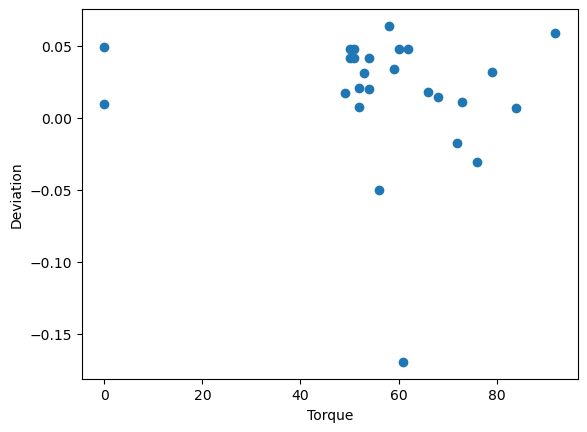

In [87]:
%matplotlib inline
plt.scatter(x=df_trq_dev['50%'], y=df_trq_dev['XMaß_Zmax [mm]_deviation'])
plt.xlabel('Torque')
plt.ylabel('Deviation')

In [35]:
def plot_operation_trq(hv_number, operation_simple):
    folder_name = utils.get_HV_folder_name(hv_number)[0]
    # Read drive and prog datasets, merge them, and preprocess the operation column
    drive = pd.read_parquet(Path(r'D:\HiWi 2.0\Daten\Hauptversuche', folder_name, r'Daten\Zeitreihendaten\drive.parquet'))
    prog = pd.read_parquet(Path(r'D:\HiWi 2.0\Daten\Hauptversuche', folder_name, r'Daten\Zeitreihendaten\prog.parquet'))
    df = pd.merge_asof(drive[['Timestamp', 'S1ActTrq']], prog[['Timestamp', 'Operation']], on='Timestamp', direction='backward')
    df.dropna(inplace=True)
    df['Operation_simple'] = df['Operation'].apply(utils.simplify_operation)
    plt.plot(df[df['Operation_simple'] == operation_simple]['S1ActTrq'])
    plt.show()

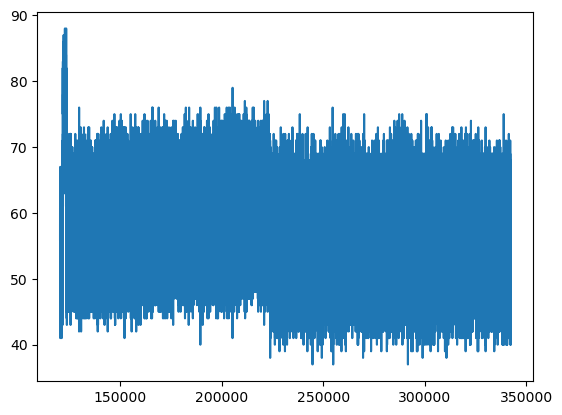

In [44]:
%matplotlib inline
plot_operation_trq(24, 'TascheOben')

# 2. Presenting findings

## 2.1. Useful functions

In [29]:
# def plot_bar(column, expected_value=None, decimal_places=1):
#     plt.figure(figsize=(16, 4))
#     plt.bar(x=df_aussenkontur['HV-Nummer'].str[2:], height=column)
#     if expected_value:
#         plt.axhline(expected_value, color='r', linestyle='--')
#     plt.xlabel('HV')
#     y_ubound = math.ceil(column.max() * (10**decimal_places)) / (10**decimal_places)
#     y_lbound = math.floor(column.min() * (10**decimal_places)) / (10**decimal_places)
#     plt.ylim((y_lbound, y_ubound))

# def get_trq_stats(hv_numbers, bezeichnungen, outputdata=None):
#     if type(hv_numbers) == int:
#         # In case a single number is given
#         hv_numbers = [hv_numbers]
#     if not outputdata:
#         outputdata = pd.read_excel(r'D:\HiWi 2.0\Daten\Qualitätsdaten_Final.xlsx', sheet_name='OutputData')

#     list_trq_stats = []

#     for hv_number in hv_numbers:
#         folder_name = utils.get_HV_folder_name(hv_number)[0]

#         # Read drive, prog and tool datasets, merge them
#         drive = pd.read_parquet(Path(r'D:\HiWi 2.0\Daten\Hauptversuche', folder_name, r'Daten\Zeitreihendaten\drive.parquet'))
#         prog = pd.read_parquet(Path(r'D:\HiWi 2.0\Daten\Hauptversuche', folder_name, r'Daten\Zeitreihendaten\prog.parquet'))
#         tool = pd.read_parquet(Path(r'D:\HiWi 2.0\Daten\Hauptversuche', folder_name, r'Daten\Zeitreihendaten\tool.parquet')).rename(columns={'Number': 'ToolID'})
#         df = pd.merge_asof(drive[['Timestamp', 'S1ActTrq']], prog[['Timestamp', 'Operation']], on='Timestamp', direction='backward')
#         df = pd.merge_asof(df, tool[['Timestamp', 'ToolID']], on='Timestamp', direction='backward')

#         # Drop rows with no information about the operation or the tool
#         df.dropna(inplace=True)

#         for bezeichnung in bezeichnungen:
#             # Find the name of the operation corresponding to the bezeichnung
#             operation = lookup_outputdata(outputdata, hv_number, bezeichnung, column='Operationsname')
            
#             # Some operations use multiple tools, find out the most common tool in this operation
#             tool_id, n_tools = find_most_common_tool(df, operation)

#             # Get torque stats for that specific operation and tool ID
#             operation_tool_filter = (df['Operation'] == operation) & (df['ToolID'] == tool_id)
#             trq_stats = df[operation_tool_filter]['S1ActTrq'].describe().rename(f'HV{hv_number}')
#             trq_stats['Bezeichnung'] = bezeichnung
#             trq_stats['ToolID'] = tool_id
#             trq_stats['n_tools'] = n_tools
#             list_trq_stats.append(trq_stats)

#     return pd.DataFrame(list_trq_stats).reset_index(names='HV-Nummer')

# def build_df_trq_dev(hv_numbers, bezeichnungen, expected_values, df_trq_stats=None, df_outputdata=None):
#     if df_outputdata == None:
#         df_outputdata_full = pd.read_excel(r'D:\HiWi 2.0\Daten\Qualitätsdaten_Final.xlsx', sheet_name='OutputData')
#         df_outputdata = df_outputdata_full[df_quality_full['HV-Nummer'].str[2:].astype(int).isin(hv_numbers)]
#     if df_trq_stats == None:    
#         df_trq_stats = get_trq_stats(hv_numbers, bezeichnungen=bezeichnungen, outputdata=df_outputdata)
    
#     df_merged = pd.merge(df_trq_stats, df_quality, on=['HV-Nummer', 'Bezeichnung'])
#     for i, column in enumerate(expected_values[bezeichnung]['columns']):
#         df_merged[f'{column}_deviation'] = df_merged[column] - expected_values[bezeichnung]['expected_values'][i]
    
#     return df_merged

# def find_most_common_tool(df, operation):
#     '''
#     For a given operation, counts the frequency of each tool ID, returns the most frequent tool ID, as well as the number of different tool IDs
#     Parameters:
#         df (pd.DataFrame): dataframe with the oeration names and tool ids across time
#         operation (str): name of the operation
#     '''
#     print('hey')
#     value_counts = df.loc[df['Operation'] == operation, 'ToolID'].value_counts()
#     n_tools = len(value_counts)
#     if n_tools <= 0:
#         # print(df['ToolID'].head())
#         print(df.loc[df['Operation'] == operation].head())
#         print(df.loc[df['Operation'] == operation, 'ToolID'])
#         print(value_counts)
#         print(f'Operation: {operation}')
#     most_common_tool_id = value_counts.index[value_counts.argmax()]
#     return most_common_tool_id, n_tools

# def lookup_outputdata(outputdata, hv_number, bezeichnung, column):
#     hv_bezeichnung_filter = (outputdata['HV-Nummer'] == f'HV{hv_number}') & (outputdata['Bezeichnung'] == bezeichnung)
#     filtered = outputdata[hv_bezeichnung_filter][column]
#     if len(filtered) == 1:
#         return outputdata[hv_bezeichnung_filter][column].iloc[0]
#     raise ValueError('No/Multiple matches found')

# def plot_operation_trq(hv_number, operation_simple):
    folder_name = utils.get_HV_folder_name(hv_number)[0]
    # Read drive and prog datasets, merge them, and preprocess the operation column
    drive = pd.read_parquet(Path(r'D:\HiWi 2.0\Daten\Hauptversuche', folder_name, r'Daten\Zeitreihendaten\drive.parquet'))
    prog = pd.read_parquet(Path(r'D:\HiWi 2.0\Daten\Hauptversuche', folder_name, r'Daten\Zeitreihendaten\prog.parquet'))
    df = pd.merge_asof(drive[['Timestamp', 'S1ActTrq']], prog[['Timestamp', 'Operation']], on='Timestamp', direction='backward')
    df.dropna(inplace=True)
    df['Operation_simple'] = df['Operation'].apply(utils.simplify_operation)
    plt.plot(df[df['Operation_simple'] == operation_simple]['S1ActTrq'])
    plt.show()

In [7]:
# EXPECTED_VALUES = {
#     'Aussenkontur': {'columns': ['XMaß_Zmax [mm]', 'YMaß_Zmax [mm]'], 'expected_values': [60, 60]}, 
#     'Steg': {'columns': ['XMaß_Zmin [mm]', 'YMaß_Zmin [mm]'], 'expected_values': [56, 56]}, 
#     'Tasche': {'columns': ['XMaß_Zmax [mm]', 'YMaß_Zmax [mm]'], 'expected_values': [40, 40]}, 
#     'Passung 10H7': {'columns': ['Durchmesser_Zmax [mm]'], 'expected_values': [10]}, 
#     'Passung 8H7': {'columns': ['Durchmesser_Zmax [mm]'], 'expected_values': [8]}
# }

In [ ]:
# x = trq_stats.get_trq_stats([i for i in range(2, 31)], bezeichnungen=['Aussenkontur', 'Steg', 'Tasche', 'Passung 10H7', 'Passung 8H7'])

In [3]:
x = trq_stats.build_df_trq_dev([i for i in range(1, 31)], bezeichnungen=['Aussenkontur', 'Steg', 'Tasche', 'Passung 10H7', 'Passung 8H7'])

HV1 - Aussenkontur failed: No tool info
HV13 - Aussenkontur failed: No tool info
HV13 - Steg failed: No tool info
HV13 - Tasche failed: No tool info
HV13 - Passung 10H7 failed: No tool info
HV13 - Passung 8H7 failed: No tool info
HV27 failed: Time series datasets not available
HV29 failed: Time series datasets not available


In [5]:
# x

## 2.2. Analysing the dataset

In [6]:
EXPECTED_VALUES = {
    'Aussenkontur': {'columns': ['XMaß_Zmax [mm]', 'YMaß_Zmax [mm]'], 'expected_values': [60, 60]}, 
    'Steg': {'columns': ['XMaß_Zmin [mm]', 'YMaß_Zmin [mm]'], 'expected_values': [56, 56]}, 
    'Tasche': {'columns': ['XMaß_Zmax [mm]', 'YMaß_Zmax [mm]'], 'expected_values': [40, 40]}, 
    'Passung 10H7': {'columns': ['Durchmesser_Zmax [mm]'], 'expected_values': [10]}, 
    'Passung 8H7': {'columns': ['Durchmesser_Zmax [mm]'], 'expected_values': [8]}
}

In [2]:
df_trq_dev_path = r'C:\Users\Usuario\Desktop\TUD\HiWi 2.0\Projekt\Deviation\df_trq_dev'

In [3]:
df_trq_dev_aussenkontur = pd.read_csv(df_trq_dev_path + '_Aussenkontur.csv')
df_trq_dev_steg = pd.read_csv(df_trq_dev_path + '_Steg.csv')
df_trq_dev_tasche = pd.read_csv(df_trq_dev_path + '_Tasche.csv')
df_trq_dev_passung10 = pd.read_csv(df_trq_dev_path + '_Passung 10H7.csv')
df_trq_dev_passung8 = pd.read_csv(df_trq_dev_path + '_Passung 8H7.csv')

In [4]:
df_trq_dev_aussenkontur.columns

Index(['HV-Nummer', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max',
       'Bezeichnung', 'ToolID', 'n_tools', 'Feature', 'Operationsname',
       'Bearbeitungszeit [hh:mm:ss:ms]', 'Störung', 'Geradheit_Zmin_X0 [mm]',
       'Geradheit_Zmin_X1 [mm]', 'Geradheit_Zmin_Y0 [mm]',
       'Geradheit_Zmin_Y1 [mm]', 'Geradheit_Zmax_X0 [mm]',
       'Geradheit_Zmax_X1 [mm]', 'Geradheit_Zmax_Y0 [mm]',
       'Geradheit_Zmax_Y1 [mm]', 'Ebenheit_X0 [mm]', 'Ebenheit_X1 [mm]',
       'Ebenheit_Y0 [mm]', 'Ebenheit_Y1 [mm]', 'XMaß_Zmin [mm]',
       'YMaß_Zmin [mm]', 'XMaß_Zmax [mm]', 'YMaß_Zmax [mm]',
       'XPosition_Zmin [mm]', 'XPosition_Zmax [mm]', 'YPosition_Zmin [mm]',
       'YPosition_Zmax [mm]', 'Durchmesser_Zmin [mm]', 'Durchmesser_Zmax [mm]',
       'Rundheit_Zmin [mm]', 'Rundheit_Zmax [mm]', 'Rauheitsklasse',
       'Rauheitsklasse Boden', 'XMaß_Zmax [mm]_deviation',
       'YMaß_Zmax [mm]_deviation'],
      dtype='object')

In [5]:
df_trq_dev_aussenkontur.head()

,HV-Nummer,count,mean,std,min,25%,50%,75%,max,Bezeichnung,...,YPosition_Zmin [mm],YPosition_Zmax [mm],Durchmesser_Zmin [mm],Durchmesser_Zmax [mm],Rundheit_Zmin [mm],Rundheit_Zmax [mm],Rauheitsklasse,Rauheitsklasse Boden,XMaß_Zmax [mm]_deviation,YMaß_Zmax [mm]_deviation
0,HV2,32307.0,0.397992,0.059841,0.1672,0.3914,0.4180,0.4332,0.5396,Aussenkontur,...,0.0,0.0,0.0,0.0,0.0,0.0,N6,0,0.01108,0.00074
1,HV3,70165.0,0.335562,0.046721,0.1368,0.3230,0.3458,0.3648,0.4598,Aussenkontur,...,0.0,0.0,0.0,0.0,0.0,0.0,N9,0,0.00670,0.02636
2,HV4,70121.0,0.314008,0.033569,0.1520,0.3002,0.3192,0.3344,0.4180,Aussenkontur,...,0.0,0.0,0.0,0.0,0.0,0.0,N9,0,0.03196,0.02632
3,HV5,28816.0,0.480141,0.187246,0.1330,0.3040,0.5054,0.6308,1.5808,Aussenkontur,...,0.0,0.0,0.0,0.0,0.0,0.0,N10,0,0.03127,0.04667
4,HV6,29014.0,0.411635,0.123906,0.1558,0.2926,0.4370,0.5130,0.7676,Aussenkontur,...,0.0,0.0,0.0,0.0,0.0,0.0,N9,0,0.06370,0.05671


Example: Scatter plot 

In [7]:
def scatter_plot(bezeichnung, tool_id, stat, expected_values=EXPECTED_VALUES, annotate=False):
    df_trq_dev = pd.read_csv(df_trq_dev_path + f'_{bezeichnung}.csv')
    bezeichnung_tool_filter = (df_trq_dev['Bezeichnung'] == bezeichnung) & (df_trq_dev['ToolID'] == tool_id)
    df_filtered = df_trq_dev[bezeichnung_tool_filter]
    deviation_columns = expected_values[bezeichnung]['columns']

    if len(deviation_columns) == 2:
        print(f'Linear correlation between deviations in {deviation_columns[0]} and {deviation_columns[1]}: {df_filtered[deviation_columns[0]].corr(df_filtered[deviation_columns[1]])}')

    for column in deviation_columns:
        x = df_filtered[stat]
        y = df_filtered[f'{column}_deviation']
        plt.scatter(x, y)
        plt.xlabel(f'Torque {stat}')
        plt.ylabel(f'Deviation in {column}')
        plt.title(f'Deviation for tool {tool_id} in {bezeichnung}')

        if annotate:
            for i, number in enumerate(df_filtered['HV-Nummer'].values):
                plt.annotate(number, (x.iloc[i], y.iloc[i]))

        plt.show()
        print(f'Linear correlation: {x.corr(y)}')

In [8]:
# Check the different tools that are used for a given Bezeichnung
df_trq_dev_aussenkontur['ToolID'].value_counts()

ToolID
55.0    29
61.0    29
60.0    27
54.0    26
52.0    23
50.0    23
19.0     1
Name: count, dtype: int64

Linear correlation between deviations in XMaß_Zmax [mm] and YMaß_Zmax [mm]: 0.9741738468857677


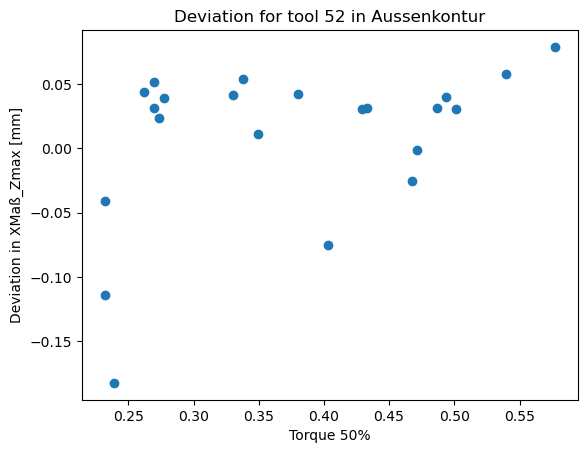

Linear correlation: 0.4143888667913227


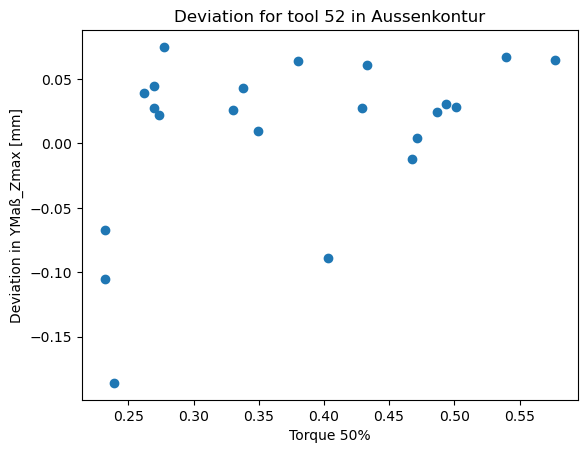

Linear correlation: 0.4099842122787139


In [47]:
%matplotlib inline
scatter_plot(bezeichnung='Aussenkontur', tool_id=52, stat='50%', annotate=False)

In [42]:
def scatter_plot_all_tools(bezeichnung, column, stat, expected_values=EXPECTED_VALUES, annotate=False):
    df_trq_dev = pd.read_csv(df_trq_dev_path + f'_{bezeichnung}.csv')

    fig, ax = plt.subplots(nrows=len(df_trq_dev['ToolID'].unique())//3 + 1, ncols=3, sharey=True, figsize=(13, 15))
    # plt.figure(figsize=(12, 20))
    k = 0

    for i, row in enumerate(ax):
        for j, col in enumerate(row):

            if k >= len(df_trq_dev['ToolID'].unique()):
                continue
            
            tool_id = df_trq_dev['ToolID'].unique()[k]
            tool_filter = (df_trq_dev['ToolID'] == tool_id)
            df_filtered = df_trq_dev[tool_filter]
            deviation_columns = expected_values[bezeichnung]['columns']

            x = df_filtered[stat]
            y = df_filtered[f'{column}_deviation']
            col.scatter(x, y)
            col.set_xlabel(f'Torque {stat}')
            col.set_ylabel(f'Deviation in {column}')
            col.set_title(f'Deviation for tool {tool_id} in {bezeichnung}')
            k += 1

            if annotate:
                for i, number in enumerate(df_filtered['HV-Nummer'].values):
                    col.annotate(number, (x.iloc[i], y.iloc[i]))

    plt.show()

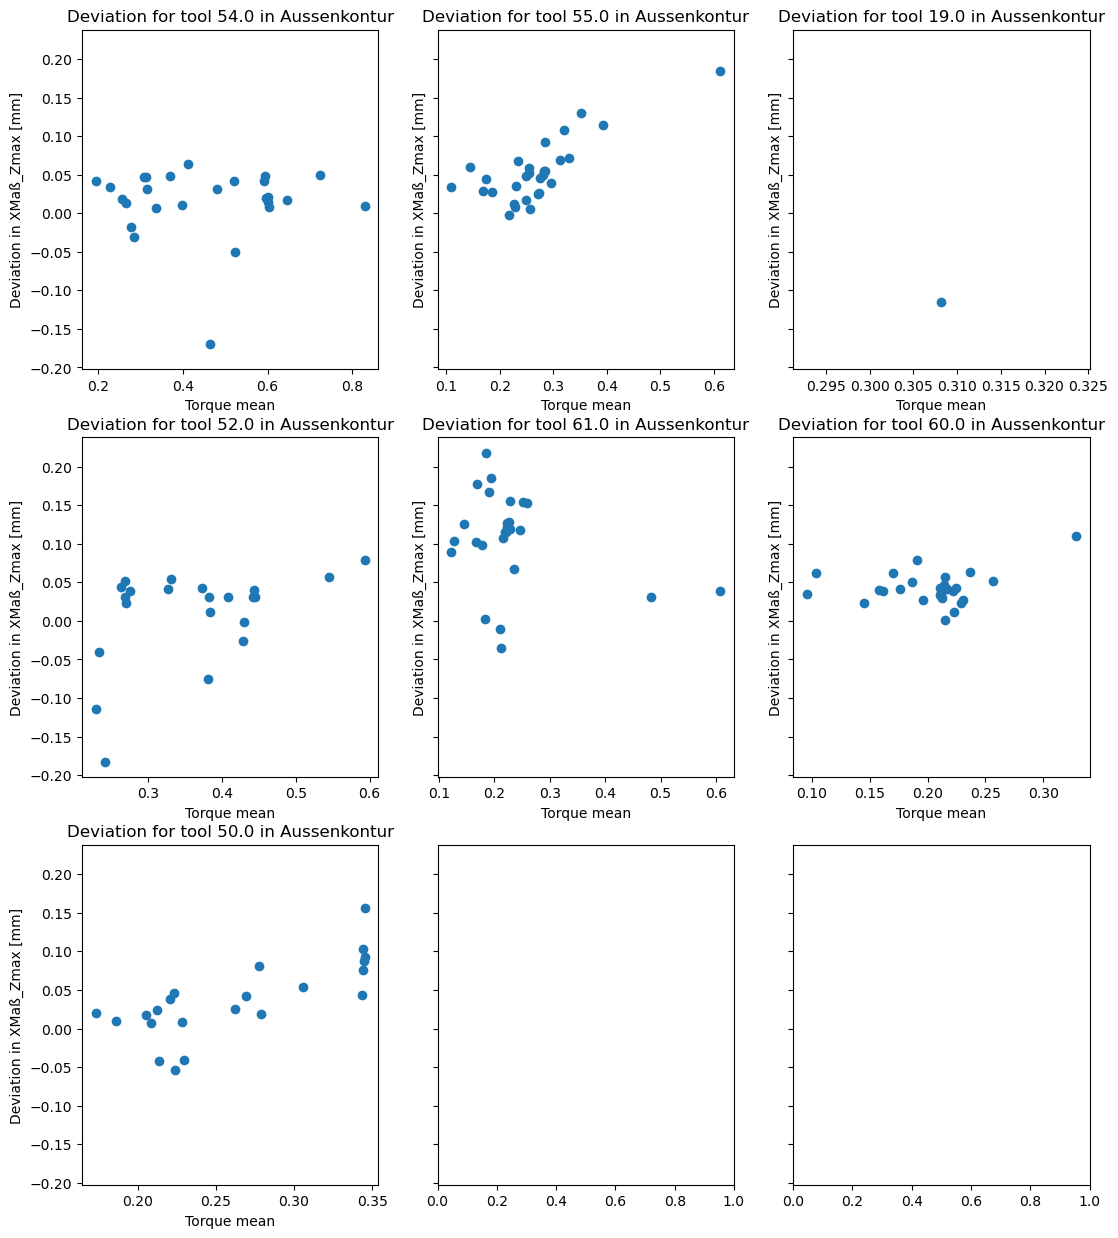

In [43]:
scatter_plot_all_tools(bezeichnung='Aussenkontur', column='XMaß_Zmax [mm]', stat='mean', expected_values=EXPECTED_VALUES, annotate=False)

In [9]:
def scatter_plot_all_tools(bezeichnung, stat, expected_values=EXPECTED_VALUES, annotate=False):
    df_trq_dev = pd.read_csv(df_trq_dev_path + f'_{bezeichnung}.csv')
    
    for tool_id in df_trq_dev['ToolID'].unique(): 
        tool_filter = (df_trq_dev['ToolID'] == tool_id)
        df_filtered = df_trq_dev[tool_filter]
        deviation_columns = expected_values[bezeichnung]['columns']

        if len(deviation_columns) == 2:
            print(f'Linear correlation between deviations in {deviation_columns[0]} and {deviation_columns[1]}: {df_filtered[deviation_columns[0]].corr(df_filtered[deviation_columns[1]])}')

        for column in deviation_columns:
            x = df_filtered[stat]
            y = df_filtered[f'{column}_deviation']
            plt.scatter(x, y)
            plt.xlabel(f'Torque {stat}')
            plt.ylabel(f'Deviation in {column}')
            plt.title(f'Deviation for tool {tool_id} in {bezeichnung}')

            if annotate:
                for i, number in enumerate(df_filtered['HV-Nummer'].values):
                    plt.annotate(number, (x.iloc[i], y.iloc[i]))

            plt.show()
            print(f'Linear correlation: {x.corr(y)}')

Linear correlation between deviations in XMaß_Zmax [mm] and YMaß_Zmax [mm]: 0.8970388518285062


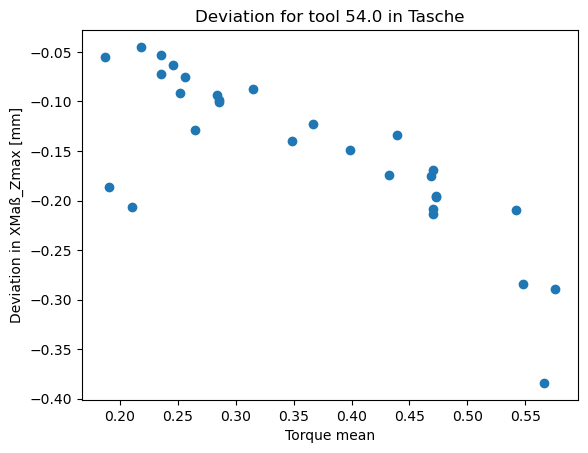

Linear correlation: -0.791704237757434


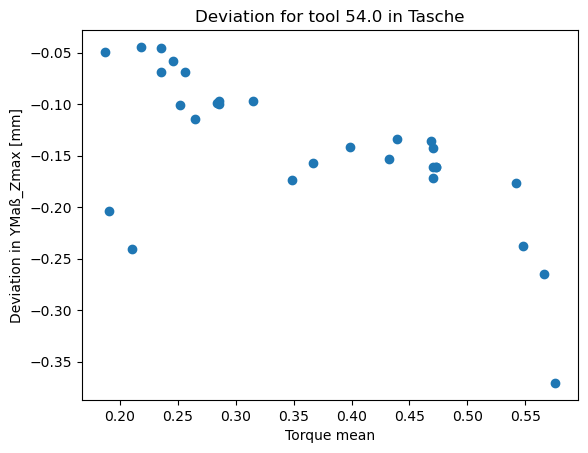

Linear correlation: -0.6600786681914813
Linear correlation between deviations in XMaß_Zmax [mm] and YMaß_Zmax [mm]: 0.9888520414026764


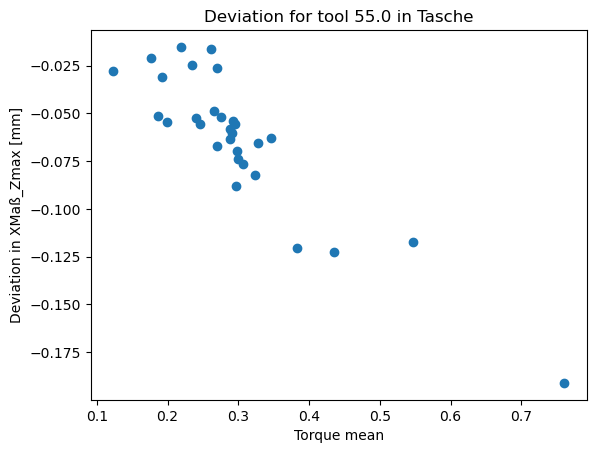

Linear correlation: -0.8977980274395033


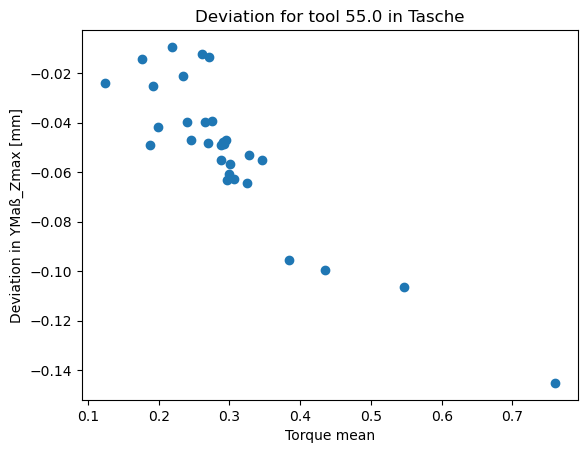

Linear correlation: -0.8890494573319646
Linear correlation between deviations in XMaß_Zmax [mm] and YMaß_Zmax [mm]: 0.9927701384947358


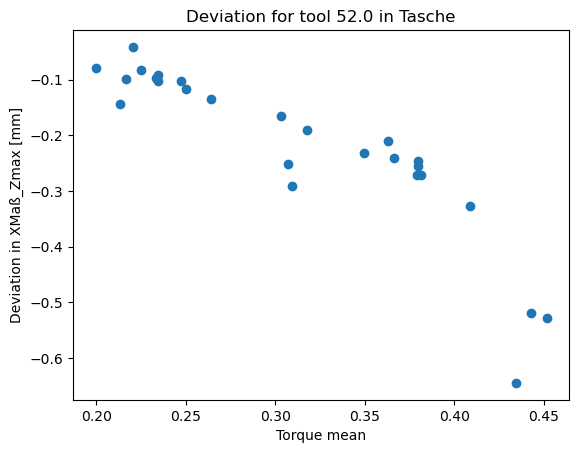

Linear correlation: -0.8823944266130437


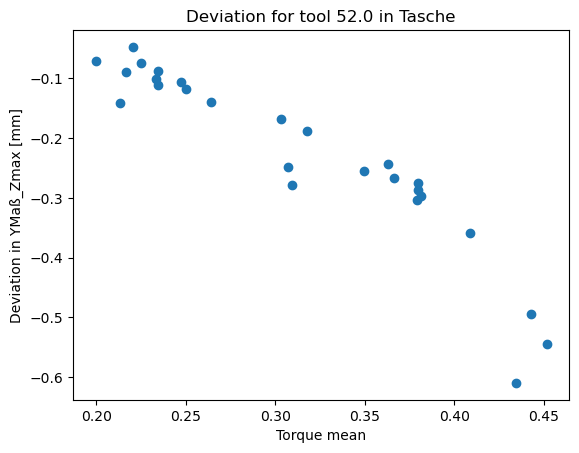

Linear correlation: -0.9264537517389013
Linear correlation between deviations in XMaß_Zmax [mm] and YMaß_Zmax [mm]: 0.9848471949103421


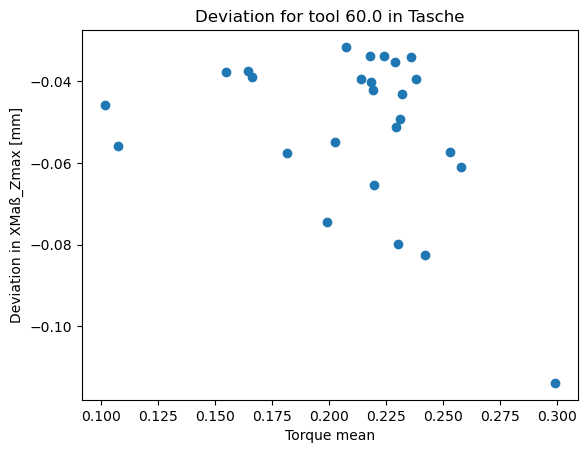

Linear correlation: -0.36838045140408643


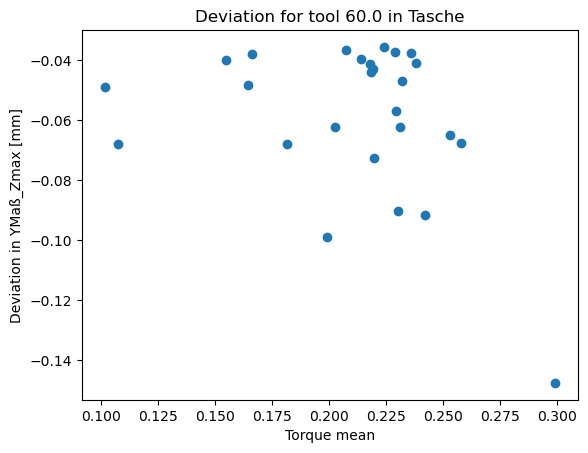

Linear correlation: -0.35061191178635637
Linear correlation between deviations in XMaß_Zmax [mm] and YMaß_Zmax [mm]: 0.990134297403635


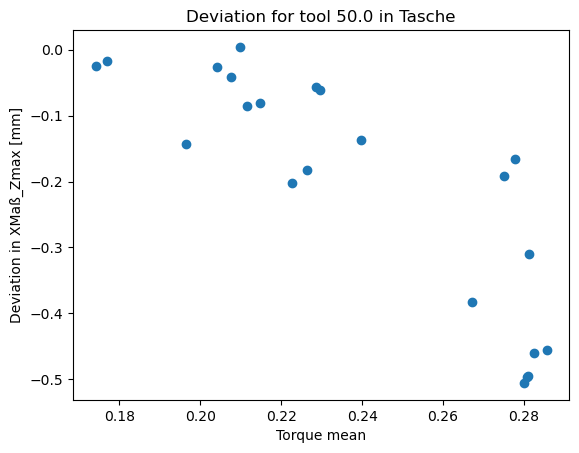

Linear correlation: -0.8432666968256249


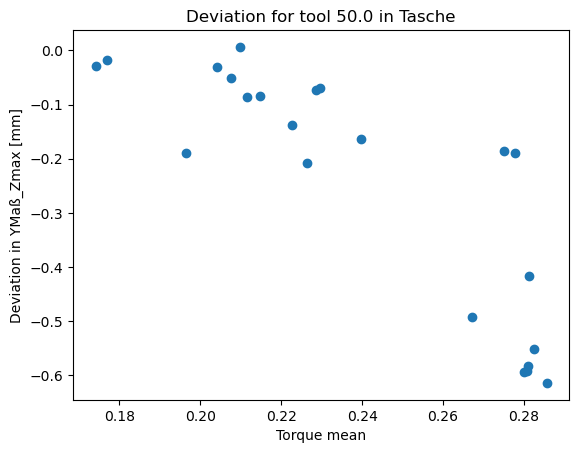

Linear correlation: -0.8394383116219828
Linear correlation between deviations in XMaß_Zmax [mm] and YMaß_Zmax [mm]: 0.9850949049809483


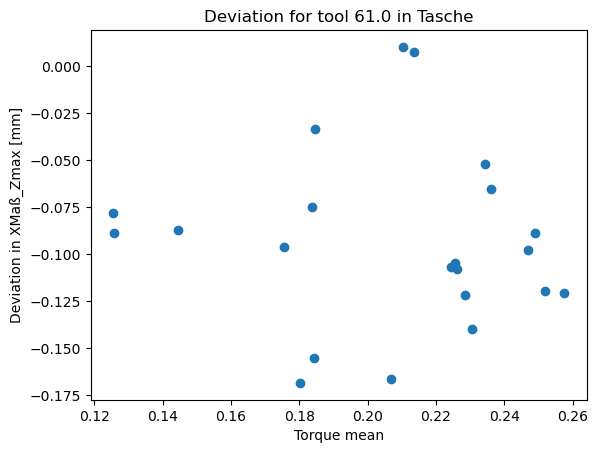

Linear correlation: -0.058620107728042936


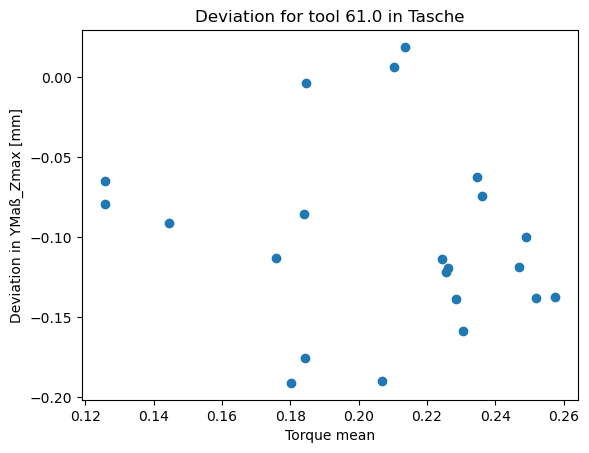

Linear correlation: -0.1627527520634449


In [12]:
scatter_plot_all_tools(bezeichnung='Tasche', stat='mean', annotate=False)

In [50]:
def scatter_plot_sum(bezeichnung, tool_id, stat1, stat2, expected_values=EXPECTED_VALUES, annotate=False):
    df_trq_dev = pd.read_csv(df_trq_dev_path + f'_{bezeichnung}.csv')
    bezeichnung_tool_filter = (df_trq_dev['Bezeichnung'] == bezeichnung) & (df_trq_dev['ToolID'] == tool_id)
    df_filtered = df_trq_dev[bezeichnung_tool_filter]
    deviation_columns = expected_values[bezeichnung]['columns']

    if len(deviation_columns) == 2:
        print(f'Linear correlation between deviations in {deviation_columns[0]} and {deviation_columns[1]}: {df_filtered[deviation_columns[0]].corr(df_filtered[deviation_columns[1]])}')

    for column in deviation_columns:
        x = df_filtered[stat1] + df_filtered[stat2]
        y = df_filtered[f'{column}_deviation']
        plt.scatter(x, y)
        plt.xlabel(f'Torque {stat1} + {stat2}')
        plt.ylabel(f'Deviation in {column}')
        plt.title(f'Deviation for tool {tool_id} in {bezeichnung}')

        if annotate:
            for i, number in enumerate(df_filtered['HV-Nummer'].values):
                plt.annotate(number, (x.iloc[i], y.iloc[i]))

        plt.show()
        print(f'Linear correlation: {x.corr(y)}')

Linear correlation between deviations in XMaß_Zmax [mm] and YMaß_Zmax [mm]: 0.9927701384947358


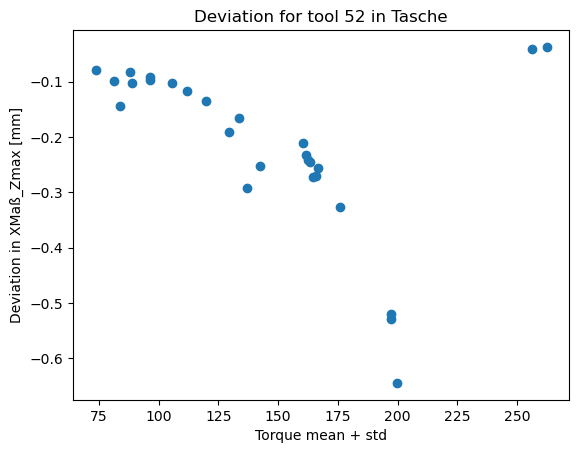

Linear correlation: -0.4065886917442223


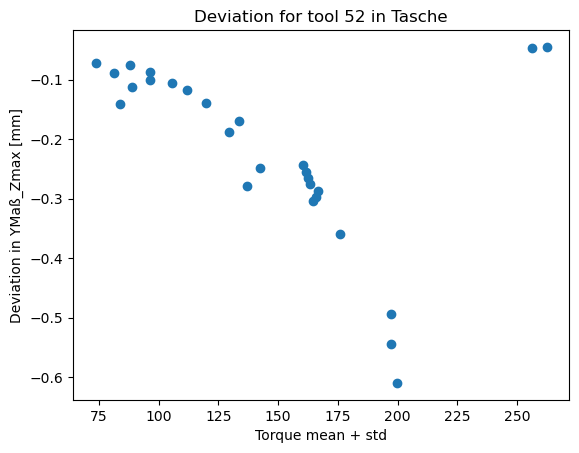

Linear correlation: -0.4358807717015299


In [51]:
scatter_plot_sum(bezeichnung='Tasche', tool_id=52, stat1='mean', stat2='std', expected_values=EXPECTED_VALUES, annotate=False)

In [46]:
def scatter_plot_all_tools_sum(bezeichnung, stat1, stat2, expected_values=EXPECTED_VALUES, annotate=False):
    df_trq_dev = pd.read_csv(df_trq_dev_path + f'_{bezeichnung}.csv')
    
    for tool_id in df_trq_dev['ToolID'].unique(): 
        tool_filter = (df_trq_dev['ToolID'] == tool_id)
        df_filtered = df_trq_dev[tool_filter]
        deviation_columns = expected_values[bezeichnung]['columns']

        if len(deviation_columns) == 2:
            print(f'Linear correlation between deviations in {deviation_columns[0]} and {deviation_columns[1]}: {df_filtered[deviation_columns[0]].corr(df_filtered[deviation_columns[1]])}')

        for column in deviation_columns:
            x = df_filtered[stat1] + df_filtered[stat2]
            y = df_filtered[f'{column}_deviation']
            plt.scatter(x, y)
            plt.xlabel(f'Torque {stat1} + {stat2}')
            plt.ylabel(f'Deviation in {column}')
            plt.title(f'Deviation for tool {tool_id} in {bezeichnung}')

            if annotate:
                for i, number in enumerate(df_filtered['HV-Nummer'].values):
                    plt.annotate(number, (x.iloc[i], y.iloc[i]))

            plt.show()
            print(f'Linear correlation: {x.corr(y)}')

Linear correlation between deviations in XMaß_Zmax [mm] and YMaß_Zmax [mm]: 0.8970388518285062


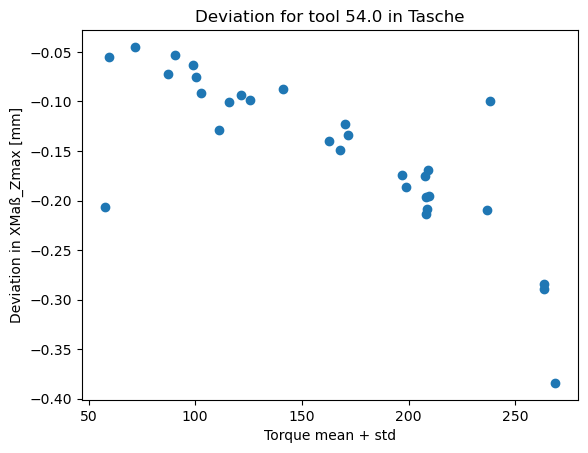

Linear correlation: -0.7857691583686002


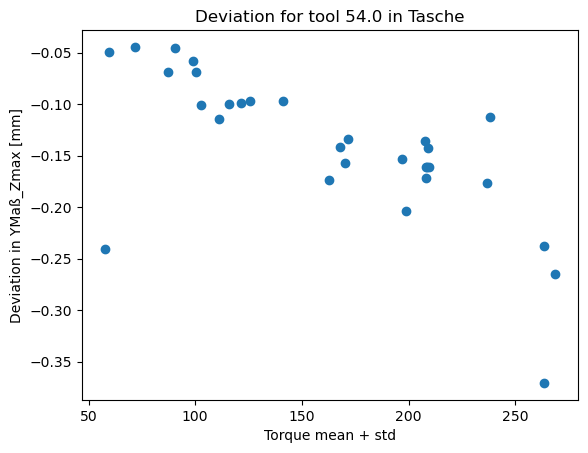

Linear correlation: -0.6951389221308546
Linear correlation between deviations in XMaß_Zmax [mm] and YMaß_Zmax [mm]: 0.9888520414026764


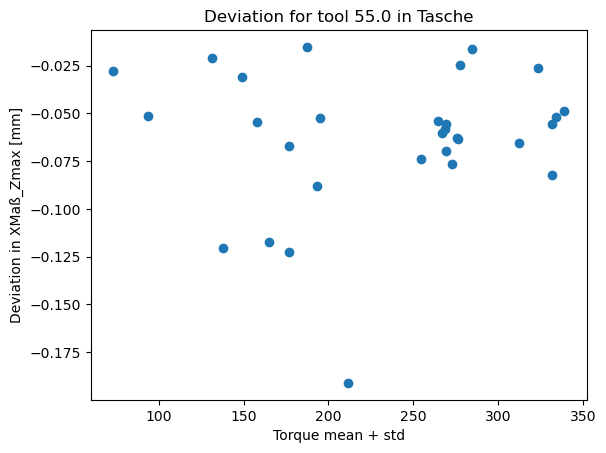

Linear correlation: 0.09320194936078717


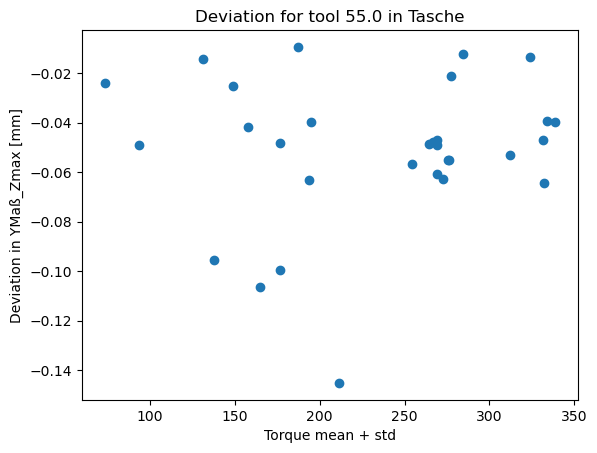

Linear correlation: 0.10080269893208964
Linear correlation between deviations in XMaß_Zmax [mm] and YMaß_Zmax [mm]: 0.9927701384947358


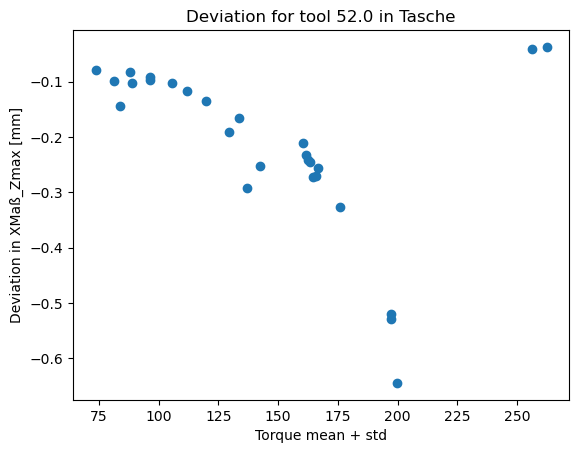

Linear correlation: -0.4065886917442223


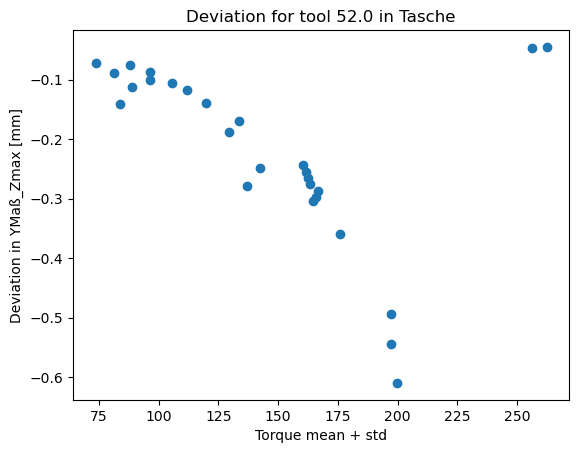

Linear correlation: -0.4358807717015299
Linear correlation between deviations in XMaß_Zmax [mm] and YMaß_Zmax [mm]: 0.9843586917686111


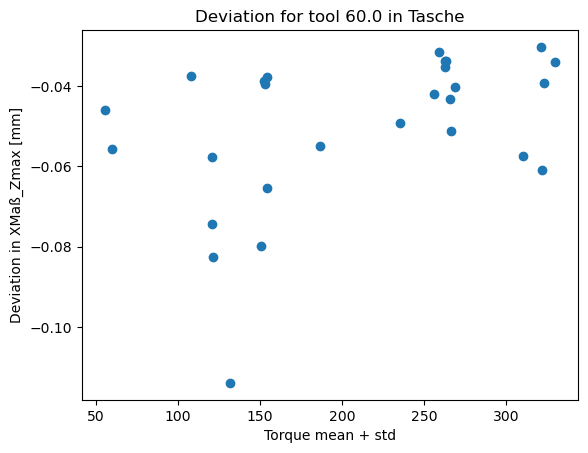

Linear correlation: 0.4312049081329932


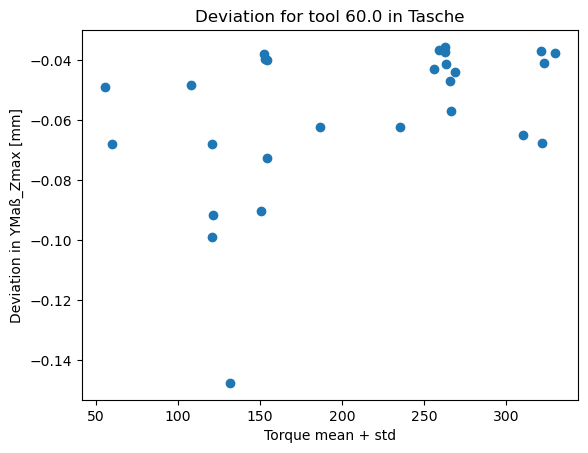

Linear correlation: 0.4312090193348004
Linear correlation between deviations in XMaß_Zmax [mm] and YMaß_Zmax [mm]: 0.990134297403635


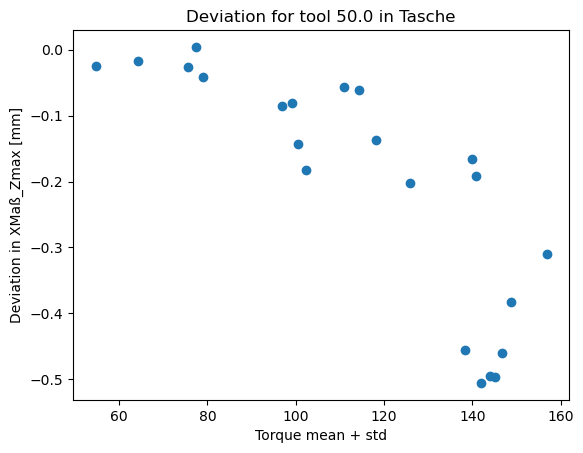

Linear correlation: -0.8191463075859174


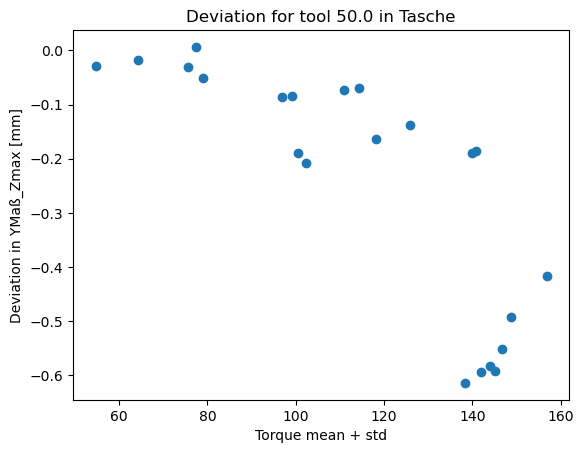

Linear correlation: -0.8010585172598113
Linear correlation between deviations in XMaß_Zmax [mm] and YMaß_Zmax [mm]: 0.9850949049809483


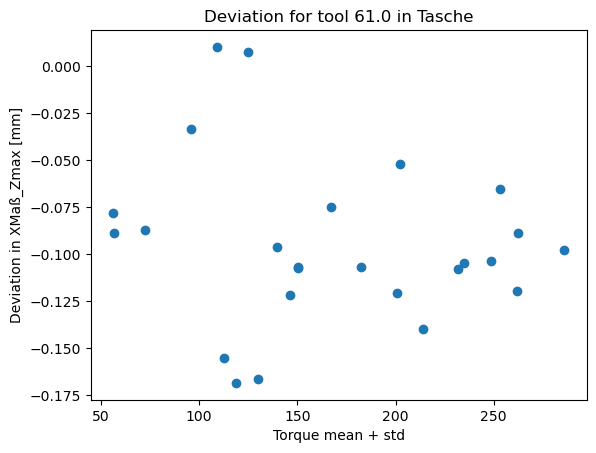

Linear correlation: -0.15028575281026624


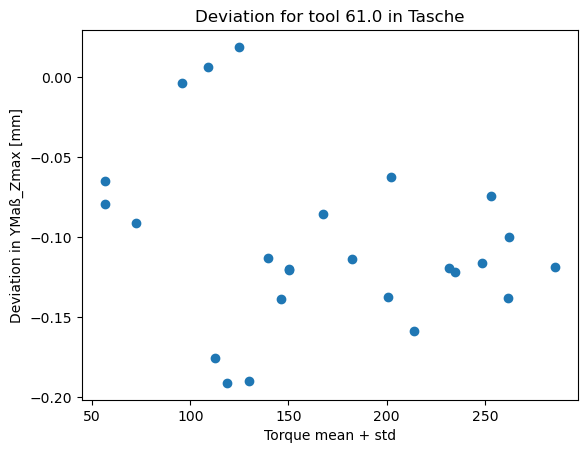

Linear correlation: -0.24450234005853044


In [47]:
scatter_plot_all_tools_sum(bezeichnung='Tasche', stat1='mean', stat2='std', expected_values=EXPECTED_VALUES, annotate=False)

In [25]:
import seaborn as sns

In [28]:
df_trq_dev_aussenkontur.columns

Index(['HV-Nummer', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max',
       'Bezeichnung', 'ToolID', 'n_tools', 'Feature', 'Operationsname',
       'Bearbeitungszeit [hh:mm:ss:ms]', 'Störung', 'Geradheit_Zmin_X0 [mm]',
       'Geradheit_Zmin_X1 [mm]', 'Geradheit_Zmin_Y0 [mm]',
       'Geradheit_Zmin_Y1 [mm]', 'Geradheit_Zmax_X0 [mm]',
       'Geradheit_Zmax_X1 [mm]', 'Geradheit_Zmax_Y0 [mm]',
       'Geradheit_Zmax_Y1 [mm]', 'Ebenheit_X0 [mm]', 'Ebenheit_X1 [mm]',
       'Ebenheit_Y0 [mm]', 'Ebenheit_Y1 [mm]', 'XMaß_Zmin [mm]',
       'YMaß_Zmin [mm]', 'XMaß_Zmax [mm]', 'YMaß_Zmax [mm]',
       'XPosition_Zmin [mm]', 'XPosition_Zmax [mm]', 'YPosition_Zmin [mm]',
       'YPosition_Zmax [mm]', 'Durchmesser_Zmin [mm]', 'Durchmesser_Zmax [mm]',
       'Rundheit_Zmin [mm]', 'Rundheit_Zmax [mm]', 'Rauheitsklasse',
       'Rauheitsklasse Boden', 'XMaß_Zmax [mm]_deviation',
       'YMaß_Zmax [mm]_deviation'],
      dtype='object')

In [39]:
columns_for_corr = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'n_tools', 'XMaß_Zmin [mm]',
       'YMaß_Zmin [mm]', 'XMaß_Zmax [mm]', 'YMaß_Zmax [mm]',
       'XMaß_Zmax [mm]_deviation',
       'YMaß_Zmax [mm]_deviation']

<Axes: >

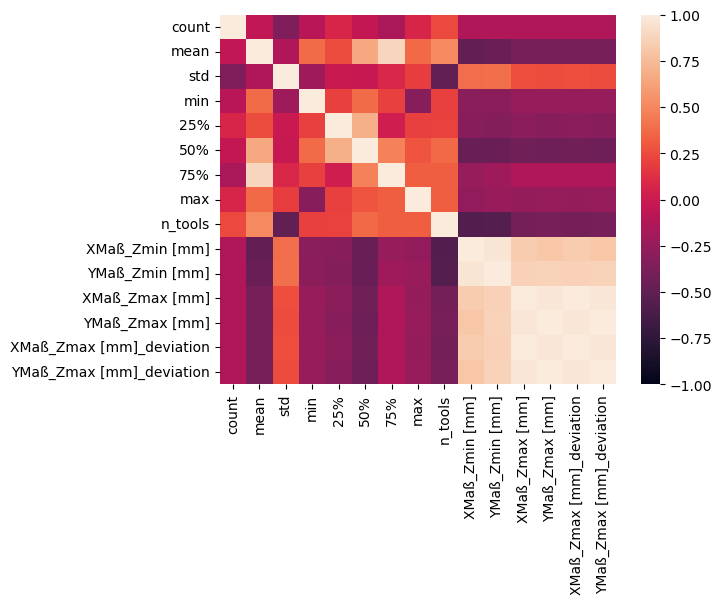

In [40]:
sns.heatmap(df_trq_dev_aussenkontur[columns_for_corr].corr(numeric_only=True), vmin=-1, vmax=1, annot=False)

In [73]:
a = trq_stats.get_trq_stats(hv_numbers=[1, 2, 3, 4, 5], bezeichnungen=['Aussenkontur', 'Steg', 'Tasche', 'Passung 10H7', 'Passung 8H7'])

HV1 - Aussenkontur failed: No tool info


In [74]:
a

,HV-Nummer,count,mean,std,min,25%,50%,75%,max,Bezeichnung,ToolID,n_tools
0,HV1,92309.0,61.180600,6.110364,39.0,57.0,61.0,65.0,84.0,Steg,54.0,1
1,HV1,59187.0,64.010222,61.496392,-516.0,63.0,74.0,80.0,102.0,Tasche,54.0,1
2,HV1,53626.0,48.705833,86.217233,-510.0,50.0,54.0,59.0,579.0,Passung 10H7,50.0,2
3,HV1,11705.0,8.813071,5.493884,-70.0,10.0,11.0,11.0,140.0,Passung 8H7,50.0,2
4,HV2,50181.0,88.840517,66.354348,-8.0,57.0,103.0,112.0,570.0,Aussenkontur,54.0,2
5,HV2,62764.0,63.999936,7.358447,39.0,60.0,65.0,69.0,85.0,Steg,54.0,1
6,HV2,41544.0,66.794050,74.427750,-513.0,63.0,77.0,92.0,114.0,Tasche,54.0,1
7,HV2,50625.0,50.058746,88.105771,-514.0,50.0,55.0,59.0,575.0,Passung 10H7,50.0,2
8,HV2,11384.0,1.276265,0.944202,-1.0,1.0,1.0,2.0,10.0,Passung 8H7,50.0,2
9,HV3,97485.0,77.809622,41.145519,-8.0,54.0,87.0,94.0,572.0,Aussenkontur,54.0,2


In [72]:
df_trq_dev[df_trq_dev['XMaß_Zmax [mm]_deviation'] > 1][['HV-Nummer', 'Bezeichnung', 'XMaß_Zmax [mm]_deviation']]

,HV-Nummer,Bezeichnung,XMaß_Zmax [mm]_deviation
4,HV2,Aussenkontur,20.01108
9,HV3,Aussenkontur,20.00670
14,HV4,Aussenkontur,20.03196
19,HV5,Aussenkontur,20.03127
24,HV6,Aussenkontur,20.06370
...,...,...,...
384,HV83,Aussenkontur,20.04347
389,HV84,Aussenkontur,19.88609
394,HV85,Aussenkontur,19.81748
399,HV88,Aussenkontur,20.05745


# 3. Deflection model

In [8]:
from get_deflection import get_cutting_force, get_deflection

In [4]:
bezeichnung = 'Steg'

In [6]:
df = pd.read_csv(Path(r'C:\Users\Usuario\Desktop\TUD\HiWi 2.0\Projekt\Deviation\df_trq_dev' + f'_{bezeichnung}.csv'))

In [7]:
df.head()

,HV-Nummer,count,mean,std,min,25%,50%,75%,max,Bezeichnung,...,YPosition_Zmin [mm],YPosition_Zmax [mm],Durchmesser_Zmin [mm],Durchmesser_Zmax [mm],Rundheit_Zmin [mm],Rundheit_Zmax [mm],Rauheitsklasse,Rauheitsklasse Boden,XMaß_Zmin [mm]_deviation,YMaß_Zmin [mm]_deviation
0,HV1,76095.0,0.237871,0.020078,0.1558,0.2242,0.2394,0.2508,0.3192,Steg,...,0.0,0.0,0.0,0.0,0.0,0.0,N9,N8,-0.12771,-0.13010
1,HV2,49401.0,0.252788,0.021156,0.1558,0.2394,0.2546,0.2660,0.3230,Steg,...,0.0,0.0,0.0,0.0,0.0,0.0,N9,N8,-0.12289,-0.13305
2,HV3,38505.0,0.275527,0.030154,0.1330,0.2622,0.2812,0.2964,0.3534,Steg,...,0.0,0.0,0.0,0.0,0.0,0.0,N9,N8,-0.13610,-0.13289
3,HV4,38499.0,0.272047,0.023470,0.1634,0.2584,0.2736,0.2888,0.3572,Steg,...,0.0,0.0,0.0,0.0,0.0,0.0,N9,N7,-0.13366,-0.13601
4,HV5,13347.0,0.412015,0.127760,0.0646,0.3040,0.4256,0.5054,1.0564,Steg,...,0.0,0.0,0.0,0.0,0.0,0.0,N9,N9,-0.16526,-0.16141


In [9]:
df.columns

Index(['HV-Nummer', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max',
       'Bezeichnung', 'ToolID', 'n_tools', 'Feature', 'Operationsname',
       'Bearbeitungszeit [hh:mm:ss:ms]', 'Störung', 'Geradheit_Zmin_X0 [mm]',
       'Geradheit_Zmin_X1 [mm]', 'Geradheit_Zmin_Y0 [mm]',
       'Geradheit_Zmin_Y1 [mm]', 'Geradheit_Zmax_X0 [mm]',
       'Geradheit_Zmax_X1 [mm]', 'Geradheit_Zmax_Y0 [mm]',
       'Geradheit_Zmax_Y1 [mm]', 'Ebenheit_X0 [mm]', 'Ebenheit_X1 [mm]',
       'Ebenheit_Y0 [mm]', 'Ebenheit_Y1 [mm]', 'XMaß_Zmin [mm]',
       'YMaß_Zmin [mm]', 'XMaß_Zmax [mm]', 'YMaß_Zmax [mm]',
       'XPosition_Zmin [mm]', 'XPosition_Zmax [mm]', 'YPosition_Zmin [mm]',
       'YPosition_Zmax [mm]', 'Durchmesser_Zmin [mm]', 'Durchmesser_Zmax [mm]',
       'Rundheit_Zmin [mm]', 'Rundheit_Zmax [mm]', 'Rauheitsklasse',
       'Rauheitsklasse Boden', 'XMaß_Zmin [mm]_deviation',
       'YMaß_Zmin [mm]_deviation'],
      dtype='object')

In [ ]:
df['Cutting_force'] = get_cutting_force(torque=df['S1ActTrq'], radius=df['Tool_Diameter'], effective_radius=0.8)

## Checking the simulation dataset

In [6]:
hv_number = 1

In [7]:
sim = pd.read_csv(Path(r'D:\HiWi 2.0\Daten\sim_voxout', f'vox_sim_HV{hv_number}.csv'))

In [8]:
sim

,Timestamp,Tool_ID i,Removed_Volume V,Penetration_Depth l_tan,Radial_Distance l_r,Width w,Surface S
0,1707843717509,54,0,0,0,0,0
1,1707843717510,54,0,0,0,0,0
2,1707843717511,54,0,0,0,0,0
3,1707843717512,54,0,0,0,0,0
4,1707843717513,54,0,0,0,0,0
...,...,...,...,...,...,...,...
516118,1707844233627,72,0,0,0,0,0
516119,1707844233628,72,0,0,0,0,0
516120,1707844233629,72,0,0,0,0,0
516121,1707844233630,72,0,0,0,0,0


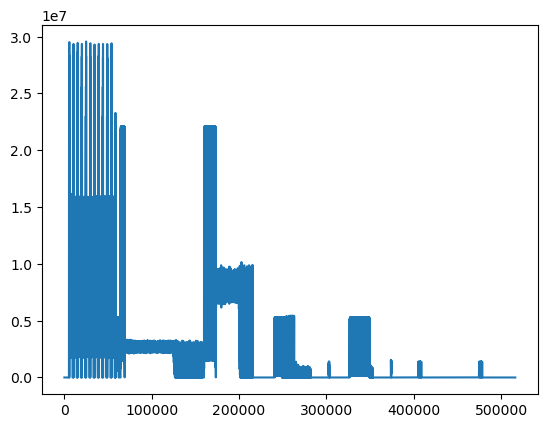

In [9]:
plt.plot(sim['Removed_Volume V'])

In [11]:
import tensorflow as tf

In [2]:
model_path = r'C:\Users\Usuario\Desktop\TUD\HiWi 2.0\Projekt\models\sp_friction_model'

In [14]:
import os

# file_path = 'path/to/your_file'
if os.path.isfile(model_path):
    with open(model_path, 'rb') as f:
        header = f.read(4)
    print(header)

b'\x80\x04\x95x'


In [3]:
import pickle

with open(model_path, 'rb') as f:
    model = pickle.load(f)
# print(type(model))
# print(model)

In [4]:
pickle.format_version

'4.0'

In [5]:
import sklearn

In [6]:
sklearn.__version__

'1.5.0'

In [7]:
type(model)

sklearn.pipeline.Pipeline

In [8]:
np.array([0, 1, 2, 3, 4]).reshape(-1, 1)

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [10]:
model.predict(np.array([34000, 34000, 34000, 34000, 34000]).reshape(-1, 1), return_std=True)

(array([0.21232794, 0.21232794, 0.21232794, 0.21232794, 0.21232794]),
 array([0.00428455, 0.00428455, 0.00428455, 0.00428455, 0.00428455]))

In [11]:
model.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures()),
  ('bayesianridge', BayesianRidge())],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(),
 'bayesianridge': BayesianRidge(),
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'bayesianridge__alpha_1': 1e-06,
 'bayesianridge__alpha_2': 1e-06,
 'bayesianridge__alpha_init': None,
 'bayesianridge__compute_score': False,
 'bayesianridge__copy_X': True,
 'bayesianridge__fit_intercept': True,
 'bayesianridge__lambda_1': 1e-06,
 'bayesianridge__lambda_2': 1e-06,
 'bayesianridge__lambda_init': None,
 'bayesianridge__max_iter': 300,
 'bayesianridge__tol': 0.001,
 'bayesianridge__verbose': False}

## 2.2. Chekcing NaNs in Tool for the first operation  

For HV1, the first 65k entries of tool are NaN, which means there is no tool information for the first operation (Aussenkontur). However, for other HVs, it seems that only the first 5k are NaN.

In [52]:
hv_folder = utils.get_HV_folder_name(3)[0]
hv_folder

'HV3_D8_1S_Schrupp_X160.0_Y0.0'

In [53]:
drive1 = pd.read_parquet(Path(r'D:\HiWi 2.0\Daten\Hauptversuche', hv_folder, r'Daten\Zeitreihendaten\drive.parquet'))
prog1 = pd.read_parquet(Path(r'D:\HiWi 2.0\Daten\Hauptversuche', hv_folder, r'Daten\Zeitreihendaten\prog.parquet'))
tool1 = pd.read_parquet(Path(r'D:\HiWi 2.0\Daten\Hauptversuche', hv_folder, r'Daten\Zeitreihendaten\tool.parquet')).rename(columns={'Number': 'ToolID'})

In [54]:
df1 = pd.merge_asof(drive1[['Timestamp', 'S1ActTrq']], prog1[['Timestamp', 'Operation']], on='Timestamp', direction='backward')
df1 = pd.merge_asof(df1, tool1[['Timestamp', 'ToolID']], on='Timestamp', direction='backward')

In [49]:
df1.isna().sum()

Timestamp        0
S1ActTrq         0
Operation      125
ToolID       65650
dtype: int64

In [55]:
df1.isna().sum()

Timestamp       0
S1ActTrq        0
Operation     116
ToolID       5254
dtype: int64

In [56]:
df1['Operation'].value_counts(dropna=False)

Operation
Channel Block_HV3_D8_1S_Schrupp_ap0.68_step_0        109946
Cavity Block (2)_HV3_D8_1S_Schrupp_step_0             67484
Cavity Block (3)_HV3_Passung_10H7_rAufmaß0.14_ste     64974
Cavity Block (4)_HV3_Passung_8H7_rAufmaß0.14_step     50784
Cavity Block_HV3_D8_1S_Schrupp_step_0                 46949
Hole Block_Operation (2)_step_0                       37401
Hole Block (2)_Operation (2)_step_0                   37365
Hole Block (2)_Operation_step_0                       34341
Hole Block_Operation_step_0                           34130
Cavity Block (3)_HV3_D4_3S_Passung_10H7_step_0        18862
Cavity Block (4)_HV3_D4_3S_Passung_8H7_step_0         18816
Cavity Block (3)_HV3_D4_3S_Passung_10H7_step_1         3636
Cavity Block (4)_HV3_D4_3S_Passung_8H7_step_1          2856
NaN                                                     116
Name: count, dtype: int64

In [57]:
df1.iloc[:61465]['ToolID'].isna().sum()

5254

In [51]:
df1.iloc[:62308]['ToolID'].isna().sum()

62308

In [21]:
prog1.head()

,Timestamp,Programname,Serialnumber,SubState,Operation,M190,M191,M192,Programname_codes,Operation_codes
Datetime,,,,,,,,,,
2024-02-13 17:01:57.634,1707843717634,HV1_D8_1S_Schrupp_X0.0_Y0.0,1707843717507,10,Channel Block_HV1_D8_1S_Schrupp_ap1.5_step_0,4,1,1,0,9
2024-02-13 17:02:59.942,1707843779942,HV1_D8_1S_Schrupp_X0.0_Y0.0,1707843717507,10,Cavity Block_HV1_D8_1S_Schrupp_step_0,4,1,1,0,7
2024-02-13 17:03:00.124,1707843780124,HV1_D8_1S_Schrupp_X0.0_Y0.0,1707843717507,10,Cavity Block_HV1_D8_1S_Schrupp_step_0,5,1,1,0,7
2024-02-13 17:04:35.468,1707843875468,HV1_D8_1S_Schrupp_X0.0_Y0.0,1707843717507,10,Cavity Block (2)_HV1_D8_1S_Schrupp_step_0,5,1,1,0,0
2024-02-13 17:04:35.629,1707843875629,HV1_D8_1S_Schrupp_X0.0_Y0.0,1707843717507,10,Cavity Block (2)_HV1_D8_1S_Schrupp_step_0,5,2,1,0,0


In [22]:
tool1.head()

,Timestamp,ID,ToolID,category,ArtNr,Name,Length,Diameter,Path,Life
2,1707843783159,3036,54,MillingEndFlat,xt0270021,8er Einschneider (4 in 1),44.5128,8.0,85078.2200,937811.40
3,1707843842747,3036,54,MillingEndFlat,xt0270021,8er Einschneider (4 in 1),44.5128,8.0,85083.2000,937871.40
4,1707843903195,3036,54,MillingEndFlat,xt0270021,8er Einschneider (4 in 1),44.5128,8.0,85087.5200,937930.50
5,1707843940689,3036,54,MillingEndFlat,xt0270021,8er Einschneider (4 in 1),44.5277,8.0,85087.5200,937930.50
6,1707843947326,28238,50,MillingEndFlat,xt0280001,4er Einschneider,38.0193,4.0,704.4844,20577.65


In HV1, there is no tool info for the first 65 seconds.

In [24]:
(1707843783159 - 1707843717634)/(1000)

65.525

## 2.4. ...

In [3]:
outputdata = pd.read_excel(r'D:\HiWi 2.0\Daten\Qualitätsdaten_Final.xlsx', sheet_name='OutputData')

In [ ]:
# I assume XMass and YMass (for Aussenkontur) should not be zero, so drop rows where that's the case

In [23]:
df_tool1 = pd.read_parquet(r'D:\HiWi 2.0\Daten\Hauptversuche\HV6_D8_1S_Schrupp_X400.0_Y0.0\Daten\Zeitreihendaten\tool.parquet').rename(columns={'Number': 'ToolID'})
df_tool1.head(10)

,Timestamp,ID,ToolID,category,ArtNr,Name,Length,Diameter,Path,Life
1,1707849297698,55647,72,Drill,XT2930003,Gewindeformer M6,61.7442,6.0,231.2762,9167.366
2,1707849304197,3036,54,MillingEndFlat,xt0270021,8er Einschneider (4 in 1),44.5223,8.0,85145.8400,938565.200
3,1707849308766,3036,54,MillingEndFlat,xt0270021,8er Einschneider (4 in 1),44.5142,8.0,85145.8400,938565.200
4,1707849311756,3036,54,MillingEndFlat,xt0270021,8er Einschneider (4 in 1),44.5142,8.0,85145.8500,938565.300
5,1707849371798,3036,54,MillingEndFlat,xt0270021,8er Einschneider (4 in 1),44.5142,8.0,85156.0300,938613.000
6,1707849410495,3036,54,MillingEndFlat,xt0270021,8er Einschneider (4 in 1),44.5285,8.0,85156.0300,938613.000
7,1707849416544,28238,50,MillingEndFlat,xt0280001,4er Einschneider,38.0215,4.0,713.3559,20946.390
8,1707849421291,28238,50,MillingEndFlat,xt0280001,4er Einschneider,38.0213,4.0,713.3559,20946.390
9,1707849425004,28238,50,MillingEndFlat,xt0280001,4er Einschneider,38.0213,4.0,713.3564,20946.430
10,1707849476127,28238,50,MillingEndFlat,xt0280001,4er Einschneider,38.0193,4.0,713.3564,20946.430


In [42]:
# Read drive and prog datasets, merge them, and preprocess the operation column
drive = pd.read_parquet(Path(r'D:\HiWi 2.0\Daten\Hauptversuche\HV6_D8_1S_Schrupp_X400.0_Y0.0\Daten\Zeitreihendaten\drive.parquet'))
prog = pd.read_parquet(Path(r'D:\HiWi 2.0\Daten\Hauptversuche\HV6_D8_1S_Schrupp_X400.0_Y0.0\Daten\Zeitreihendaten\prog.parquet'))
df = pd.merge_asof(drive[['Timestamp', 'S1ActTrq']], prog[['Timestamp', 'Operation']], on='Timestamp', direction='backward')
# df.dropna(inplace=True)

In [43]:
df = pd.merge_asof(df, df_tool1[['Timestamp', 'ToolID']], on='Timestamp', direction='backward')
# df.dropna(inplace=True)

In [44]:
df.head(15)

,Timestamp,S1ActTrq,Operation,ToolID
0,1707849292681,-7,NaN,NaN
1,1707849292682,-8,NaN,NaN
2,1707849292683,-7,NaN,NaN
3,1707849292684,-8,NaN,NaN
4,1707849292685,-7,NaN,NaN
5,1707849292686,-8,NaN,NaN
6,1707849292687,-8,NaN,NaN
7,1707849292688,-8,NaN,NaN
8,1707849292689,-8,NaN,NaN
9,1707849292690,-8,NaN,NaN


In [29]:
df['Operation'].shift()

4939                                               None
4940      Channel Block_HV6_D8_1S_Schrupp_ap0.68_step_0
4941      Channel Block_HV6_D8_1S_Schrupp_ap0.68_step_0
4942      Channel Block_HV6_D8_1S_Schrupp_ap0.68_step_0
4943      Channel Block_HV6_D8_1S_Schrupp_ap0.68_step_0
                              ...                      
416685              Hole Block (2)_Operation (2)_step_0
416686              Hole Block (2)_Operation (2)_step_0
416687              Hole Block (2)_Operation (2)_step_0
416688              Hole Block (2)_Operation (2)_step_0
416689              Hole Block (2)_Operation (2)_step_0
Name: Operation, Length: 411751, dtype: object

In [33]:
df[(df['Operation'].shift() != df['Operation']) | (df['ToolID'].shift() != df['ToolID'])]

,Timestamp,S1ActTrq,Operation,ToolID
4939,1707849297698,-8,Channel Block_HV6_D8_1S_Schrupp_ap0.68_step_0,72.0
11438,1707849304197,-7,Channel Block_HV6_D8_1S_Schrupp_ap0.68_step_0,54.0
65122,1707849357881,47,Cavity Block_HV6_D8_1S_Schrupp_step_0,54.0
84750,1707849377509,57,Cavity Block (2)_HV6_D8_1S_Schrupp_step_0,54.0
112056,1707849404815,-9,Cavity Block (3)_HV6_Passung_10H7_rAufmaß0.14_ste,54.0
123785,1707849416544,-10,Cavity Block (3)_HV6_Passung_10H7_rAufmaß0.14_ste,50.0
177570,1707849470329,-1,Cavity Block (3)_HV6_D4_3S_Passung_10H7_step_0,50.0
191165,1707849483924,0,Cavity Block (3)_HV6_D4_3S_Passung_10H7_step_0,61.0
197454,1707849490213,496,Cavity Block (3)_HV6_D4_3S_Passung_10H7_step_1,61.0
200314,1707849493073,-6,Cavity Block (4)_HV6_Passung_8H7_rAufmaß0.14_step,61.0


## Finding the most common tool in each operation

In [45]:
for operation in df['Operation'].unique()[:5]:
    print(f'Operation: {operation}')
    print(f'len() = {len(df.loc[df['Operation'] == operation, 'ToolID'].value_counts())}')
    print(df.loc[df['Operation'] == operation, 'ToolID'].value_counts())
    print('='*100)

Operation: nan
len() = 0
Series([], Name: count, dtype: int64)
Operation: Channel Block_HV6_D8_1S_Schrupp_ap0.68_step_0
len() = 2
ToolID
54.0    53684
72.0     6499
Name: count, dtype: int64
Operation: Cavity Block_HV6_D8_1S_Schrupp_step_0
len() = 1
ToolID
54.0    19628
Name: count, dtype: int64
Operation: Cavity Block (2)_HV6_D8_1S_Schrupp_step_0
len() = 1
ToolID
54.0    27306
Name: count, dtype: int64
Operation: Cavity Block (3)_HV6_Passung_10H7_rAufmaß0.14_ste
len() = 2
ToolID
50.0    53785
54.0    11729
Name: count, dtype: int64


In [52]:
df.loc[df['Operation'] == 'Cavity Block (3)_HV6_Passung_10H7_rAufmaß0.14_ste', 'ToolID'].value_counts()

ToolID
50.0    53785
54.0    11729
Name: count, dtype: int64

In [47]:
df.loc[df['Operation'] == 'Cavity Block (3)_HV6_Passung_10H7_rAufmaß0.14_ste', 'ToolID'].value_counts().argmax()

0

In [49]:
df.loc[df['Operation'] == 'Cavity Block (3)_HV6_Passung_10H7_rAufmaß0.14_ste', 'ToolID'].value_counts().index[0]

50.0

In [51]:
find_most_common_tool(df, 'Cavity Block (3)_HV6_Passung_10H7_rAufmaß0.14_ste')

(50.0, 2)

# Appendix